# Ottimizzazione

L'ottimizzazione consiste nello scegliere l'opzione migliore in un set di opzioni
___
Il problema dell'ottimizzazione può essere risolto, almeno in alcuni campi, utilizzando l'algoritmo giusto.

Abbiamo già visto un caso con Minimax, vediamo ora altri algoritmi.

# Local Search

Algoritmi di ricerca che mantengono un singolo nodo ed effettua una ricerca muovendosi a un nodo vicino.
___
Gli algoritmi visti in precedenza, DFS o BFS ad esempio, mantengono più nodi attraverso la frontiera per tenere memoria del percorso.

Questo tipo di algoritmi è ottimo quando non ci interessa del percorso, ma solo quale è la soluzione.

## Astrazione

Generalizziamo i problemi che voglio risolvere con la Local Search.

Posso raffigurare il problema pensando a loro come una **state-space landscape**:

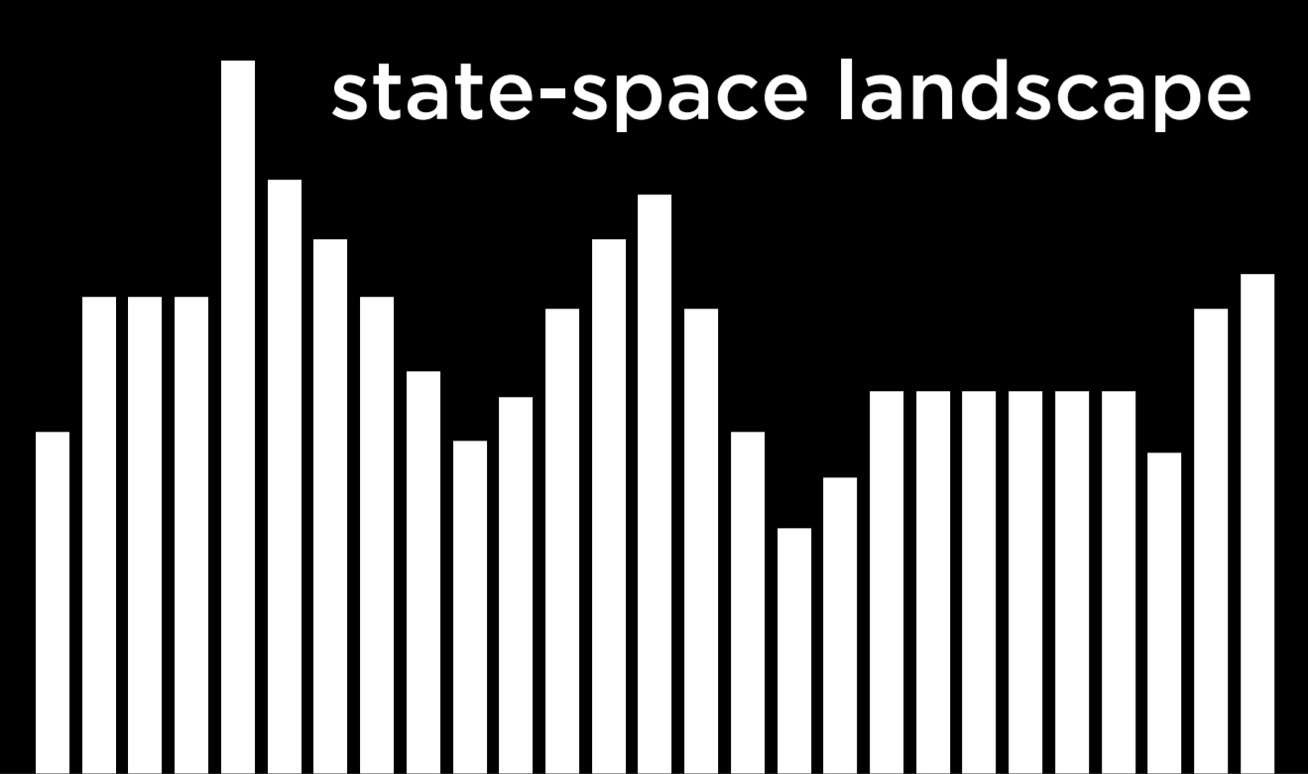

Ogni barra verticale rappresenta una certa configurazione, e la sua altezza rappresenta un valore o una funzione associata ad essa.

Quando abbiamo una state-space landscape, di solito vogliamo fare una di due cose:

- Trovare il **global maximum**
  
  - Uno stato il cui valore è il più alto tra tutti gli stati tra cui possiamo scegliere
  - Quando valutiamo questo caso, chiamiamo la funzione che usiamo **objective function**

  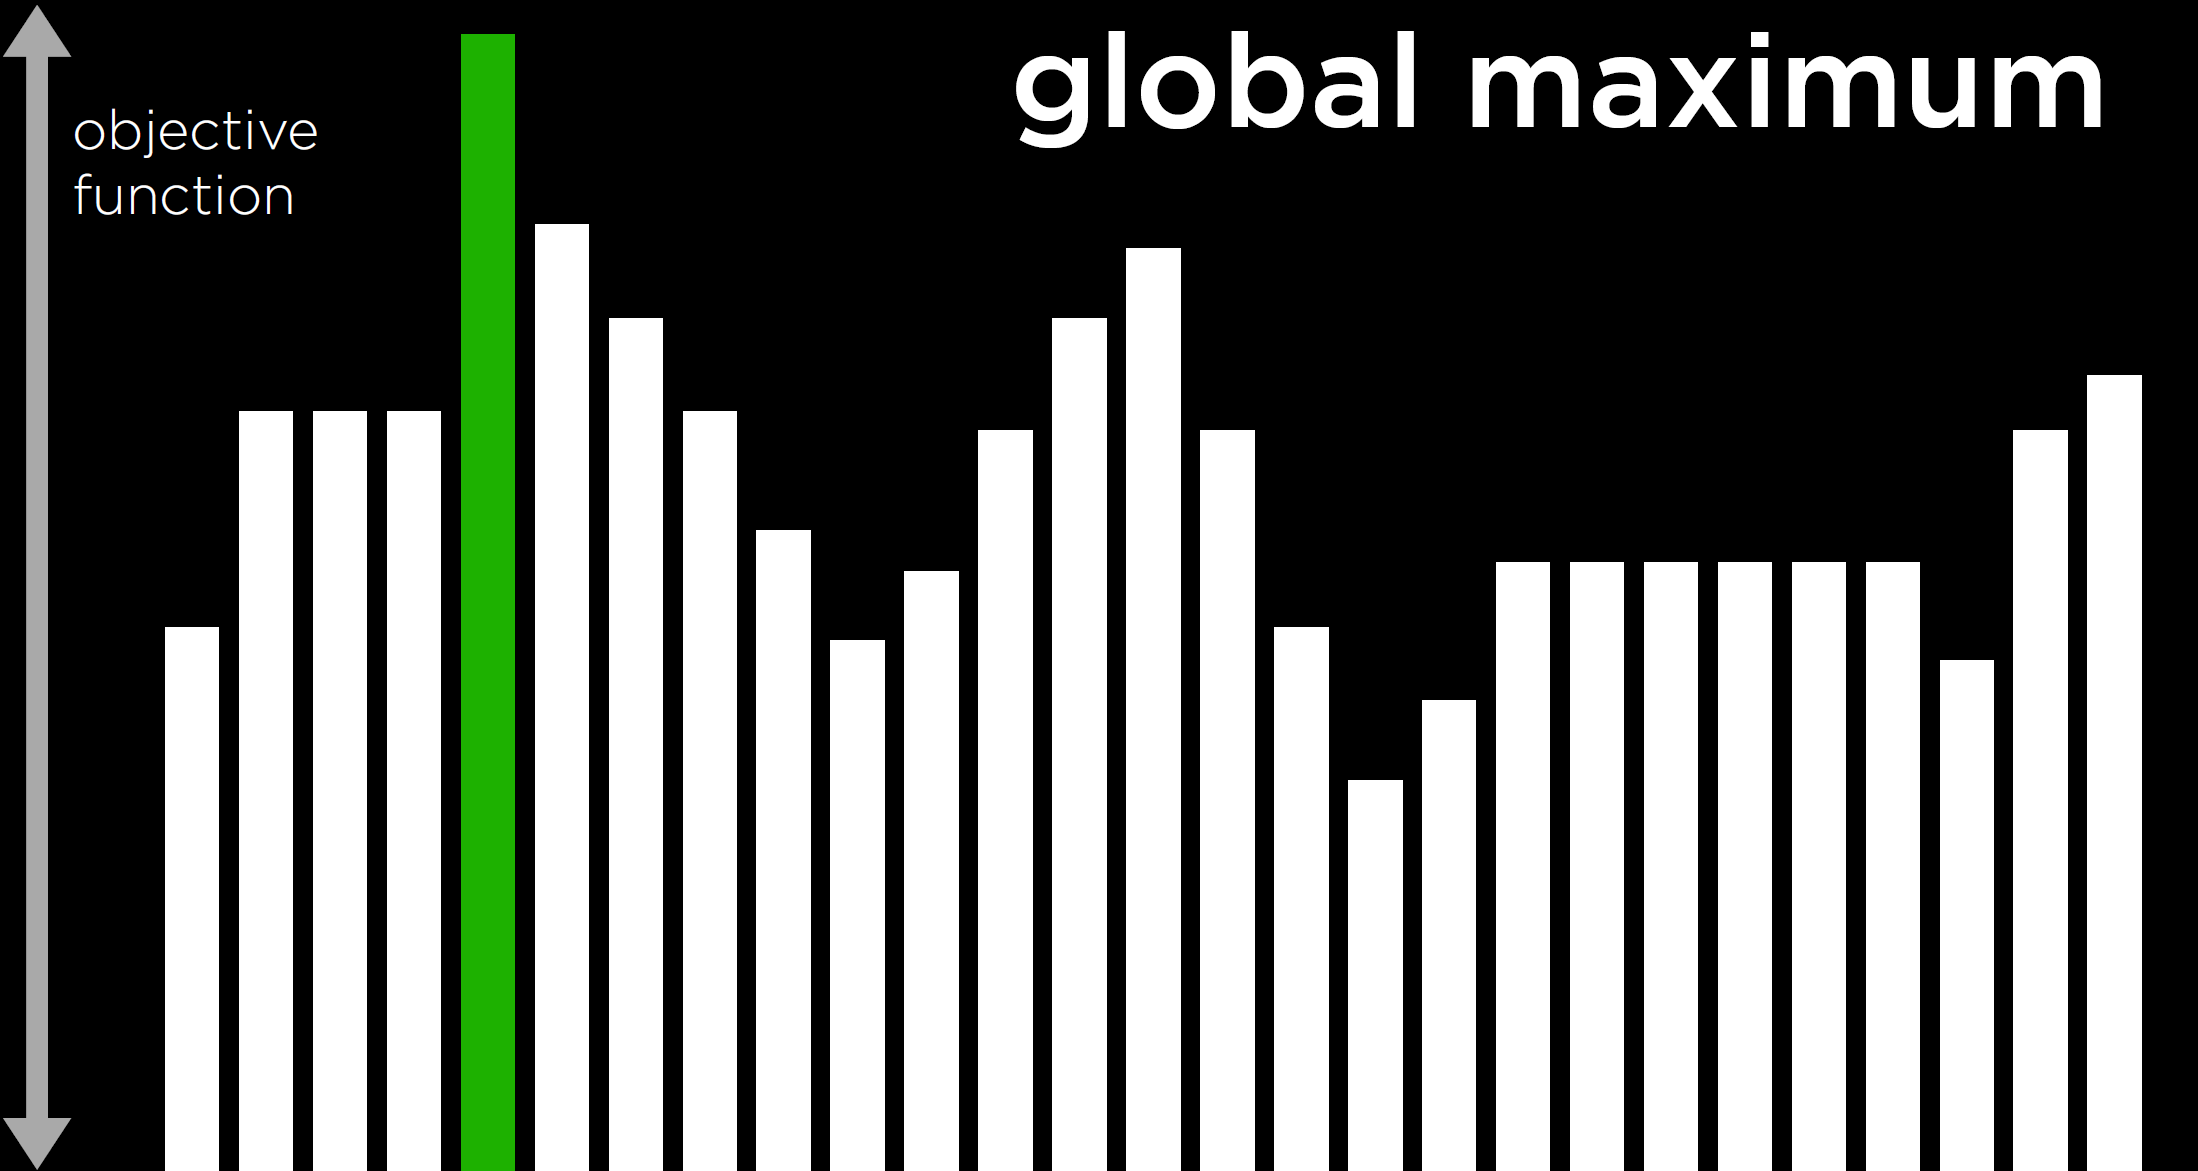

- Trovare il **global minimum**
  
  - Uno stato il cui valore è il più basso tra tutti gli stati tra cui possiamo scegliere
  - Quando valutiamo questo caso, chiamiamo la funzione che usiamo **cost function**

  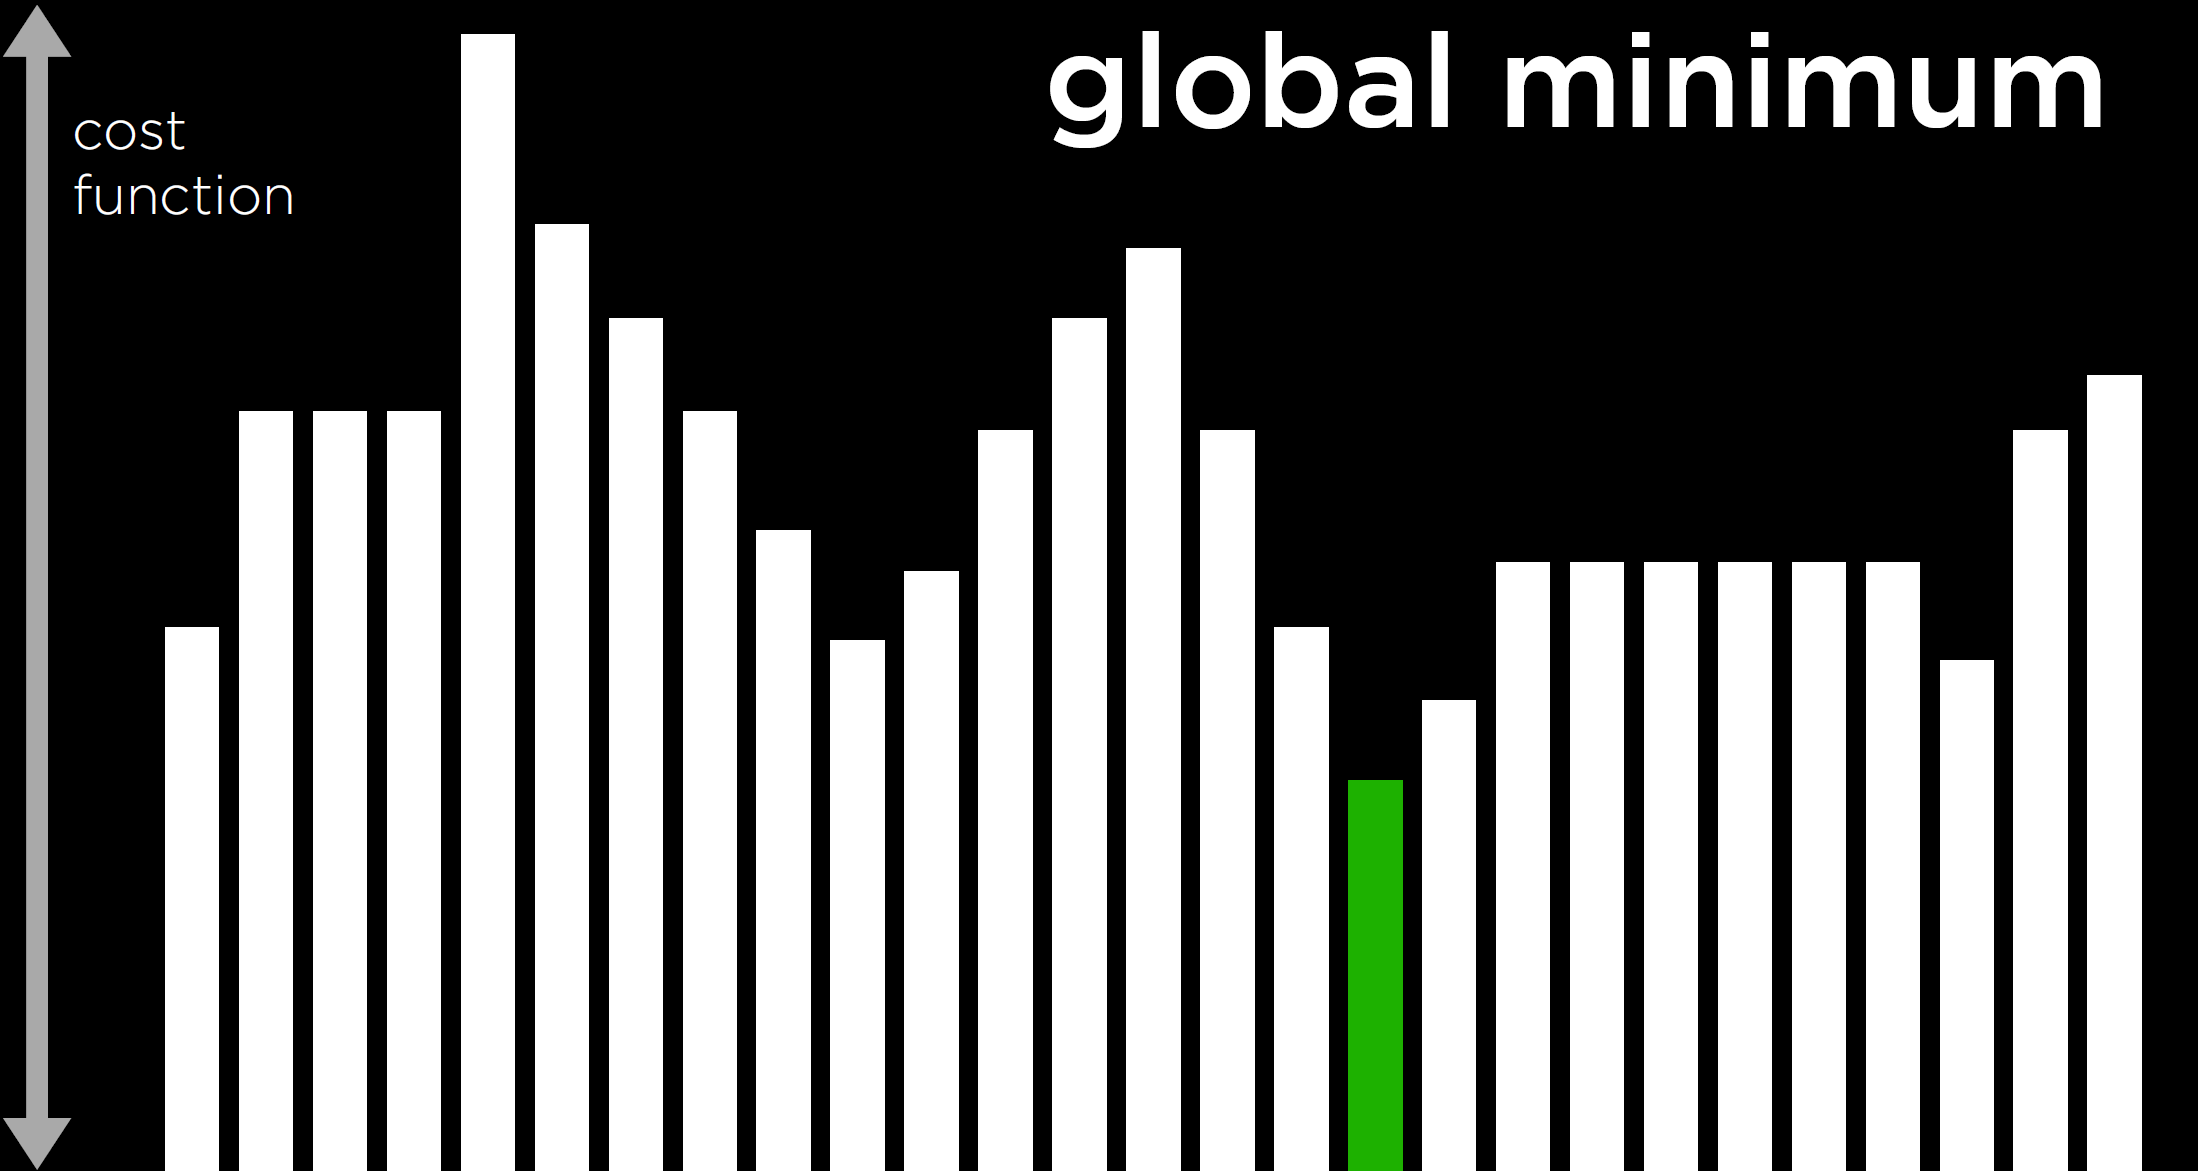

### Come funziona?

Manteniamo in memoria un singolo stato, che sarà il nostro stato corrente.

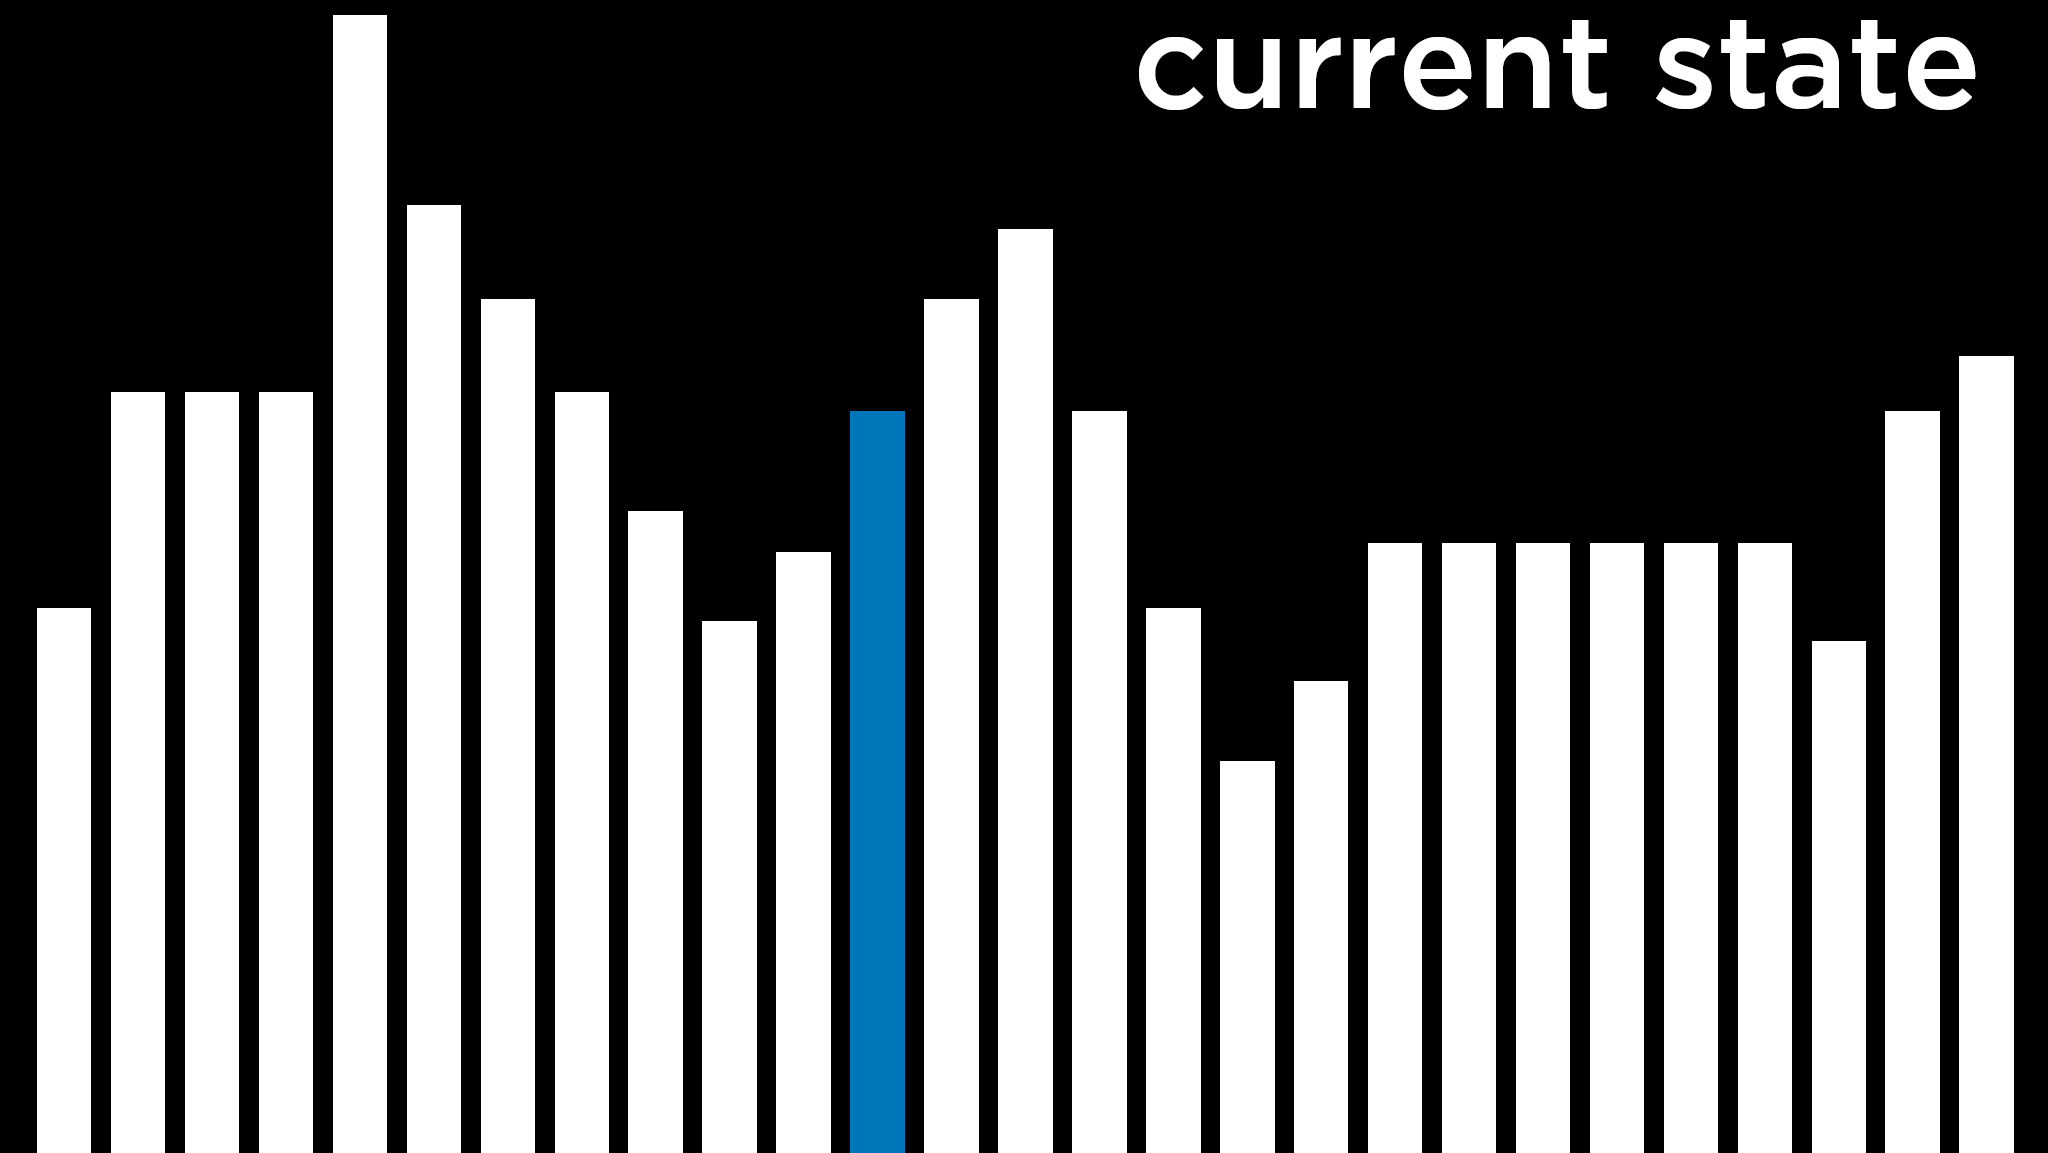

Da questo stato, ci muoviamo verso uno dei suoi vicini

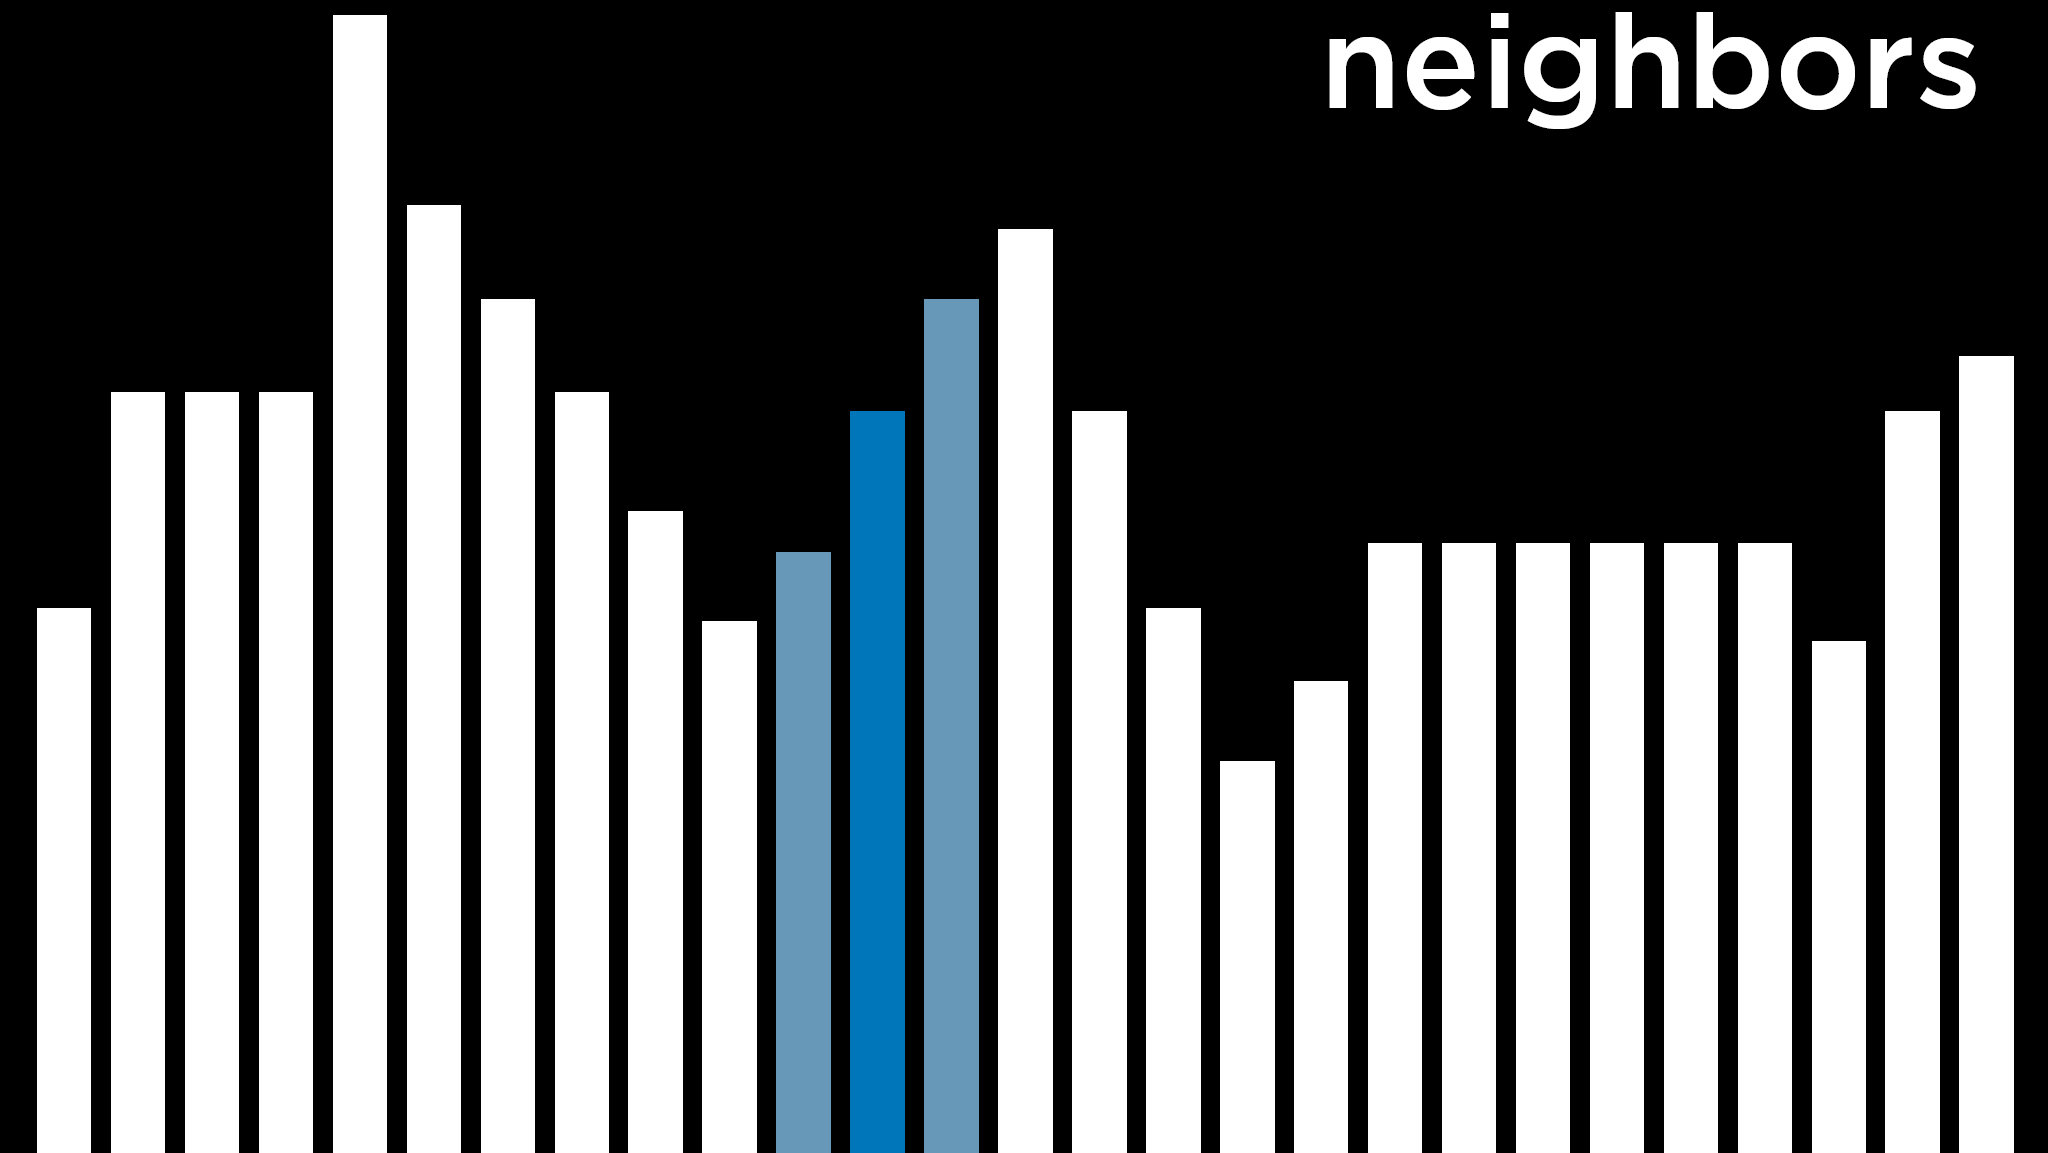

### Esempio

In un mondo fatto come l'immagine sotto, dove ci sono varie case, voglio provare a piazzare due ospedali in modo da minimizzare la distanza di ogni casa da un ospedale.

Un modo per far ciò è un'euristica come la Distanza di Manhattan, che abbiamo già visto.

Il *costo* della distribuzione nell'immagine, e quindi l'altezza della barra di questa configurazione, è 17.

Se vogliamo muoverci verso uno dei "vicini" di questo stato, potrei, ad esempio, spostare solo uno dei due ospedali di una cella, in qualsiasi direzione.

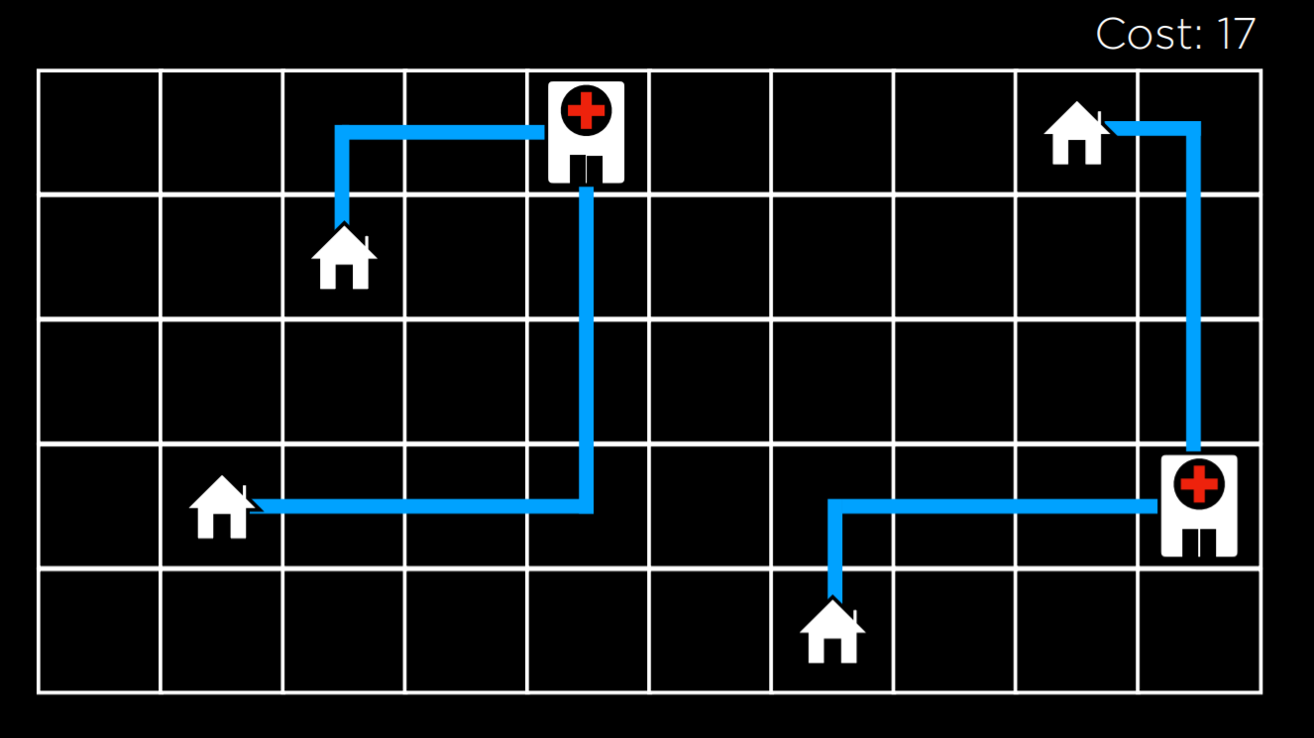

# Hill Climbing

È un tipo di algoritmo di Local Search.

In questo algoritmo, gli stati vicini sono comparati allo stato corrente.

Gli stati vicini sono considerati migliori a seconda del fatto che sto usando un'*objective function*, quindi cerco un valore più alto, o una *cost function*, con cui cerco un valore più basso.

## Pseudocodice Hill Climbing

I valori in parentesi quadre [] rappresentano variabili
___

```
function Hill-Climb([problem]):
    [current] = initial state of [problem]
repeat:
    [neighbor] = highest valued neighbor of [current]
    if [neighbor] not better than [current]:
        return [current]
    [current = neighbor]
```

### Esempio

Riprendendo l'esempio di prima con quella configurazione, ricordiamo che il costo era pari a 17. Noi stiamo cercando di minimizzarlo.

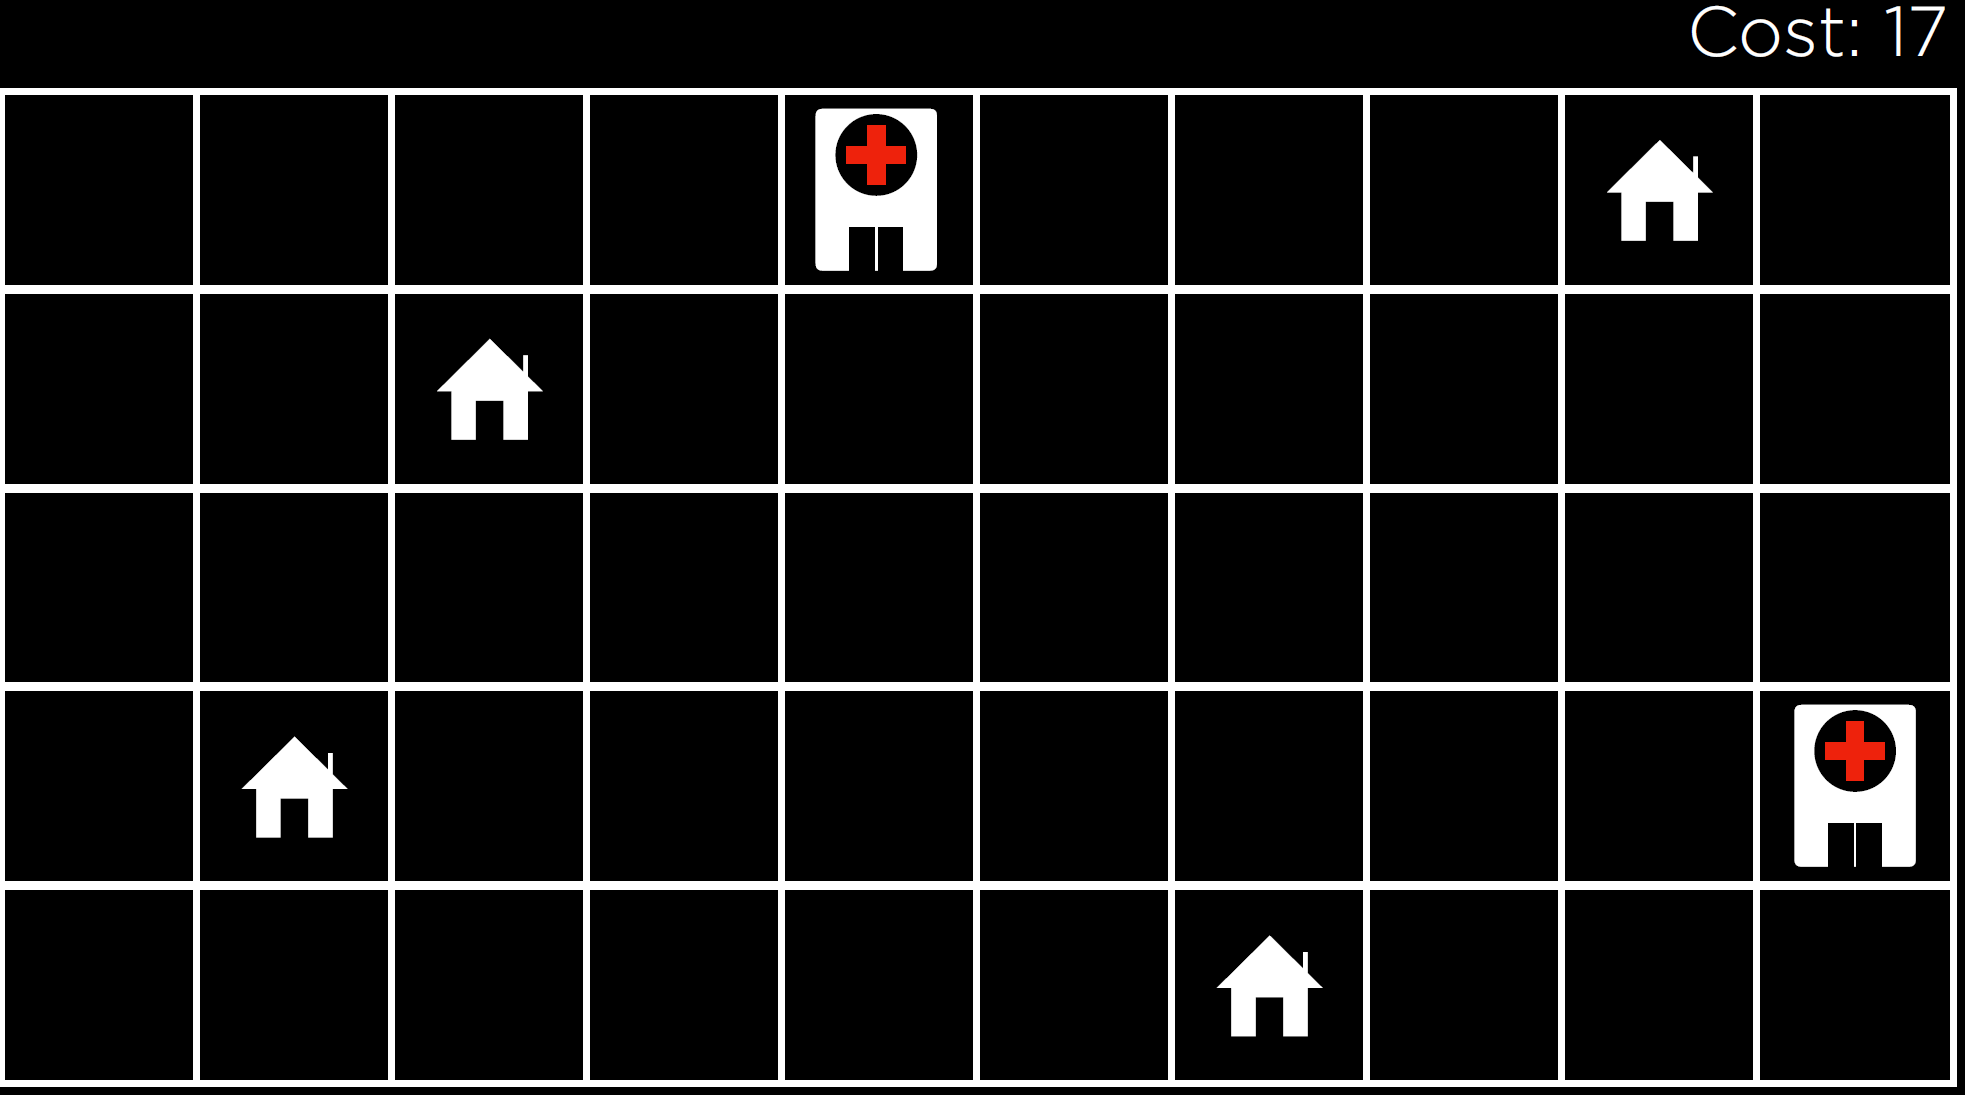

Valuto i vicini di questo stato, quindi magari muovere gli ospedali di una cella:

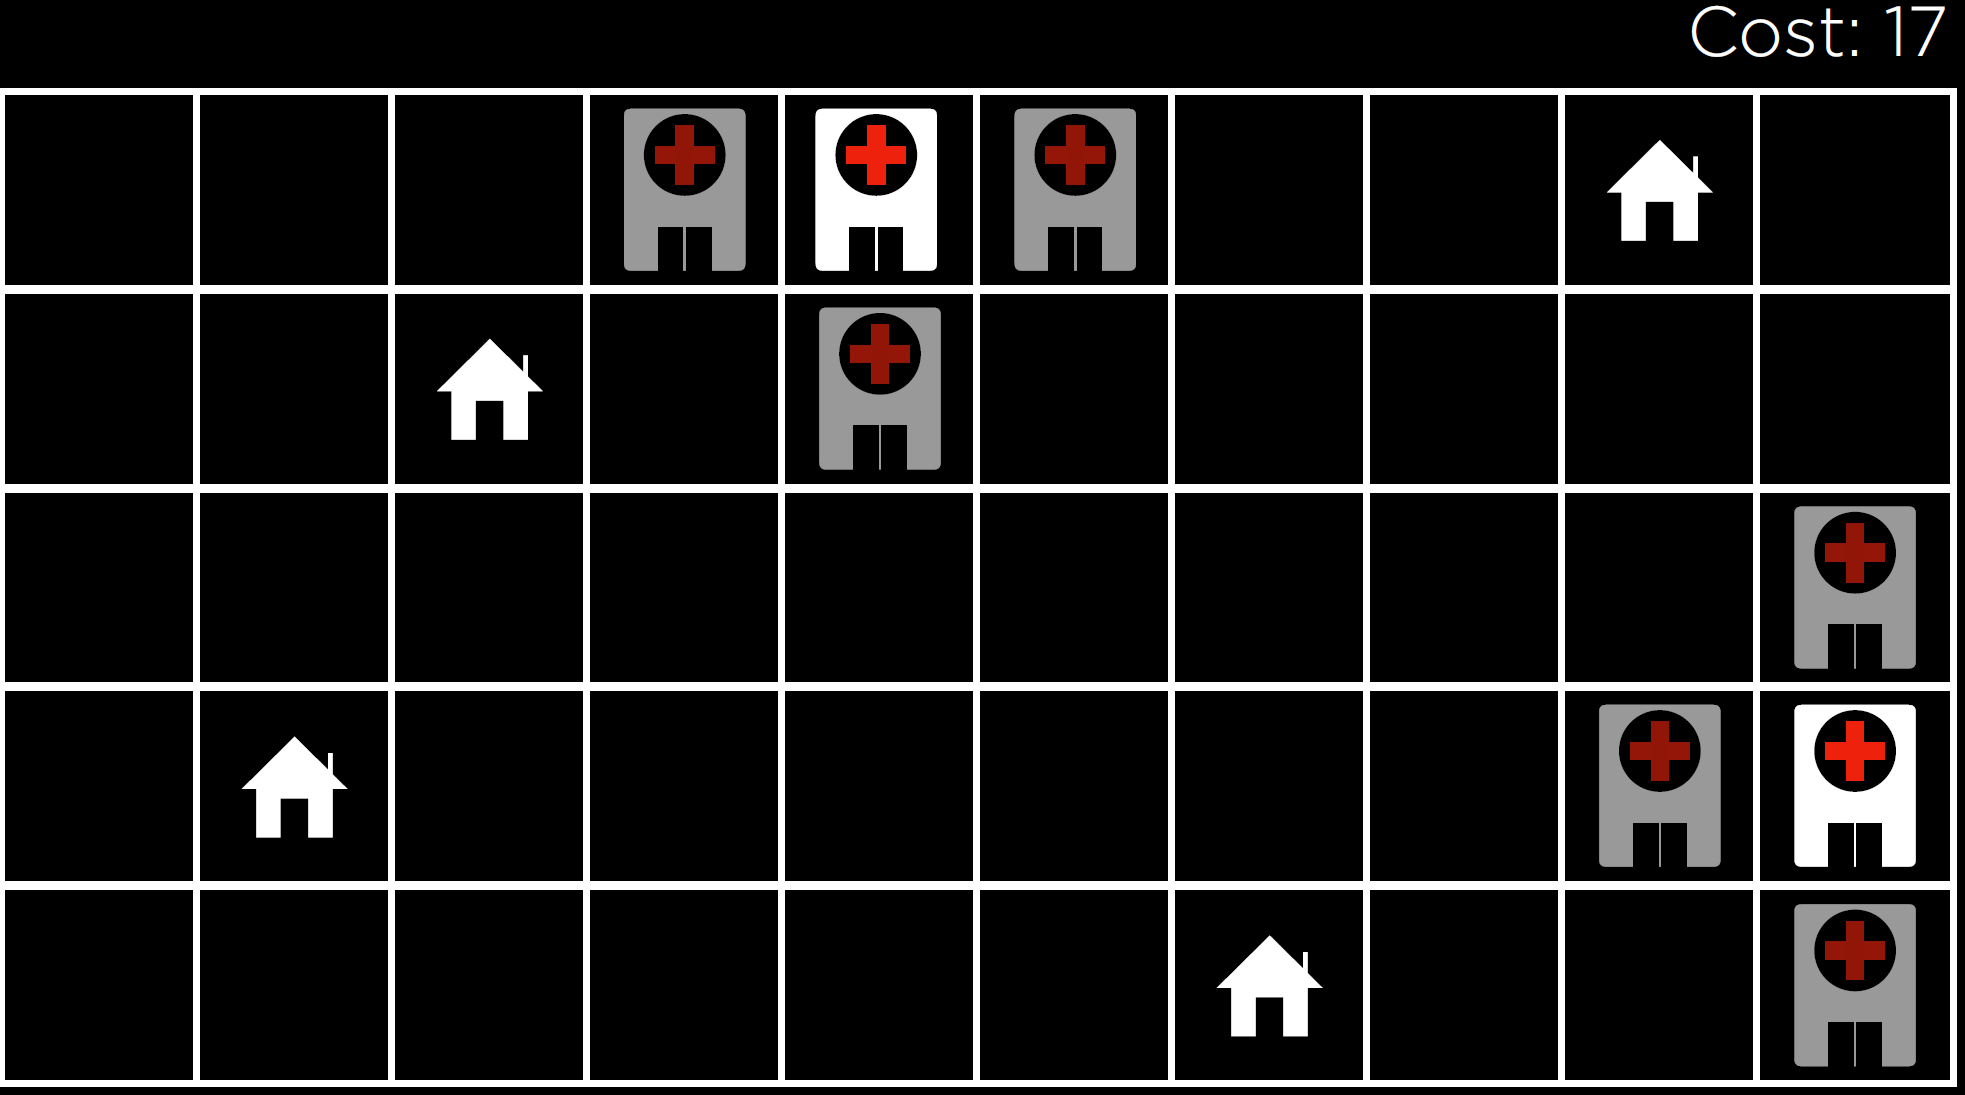

Considero il percorso originale:

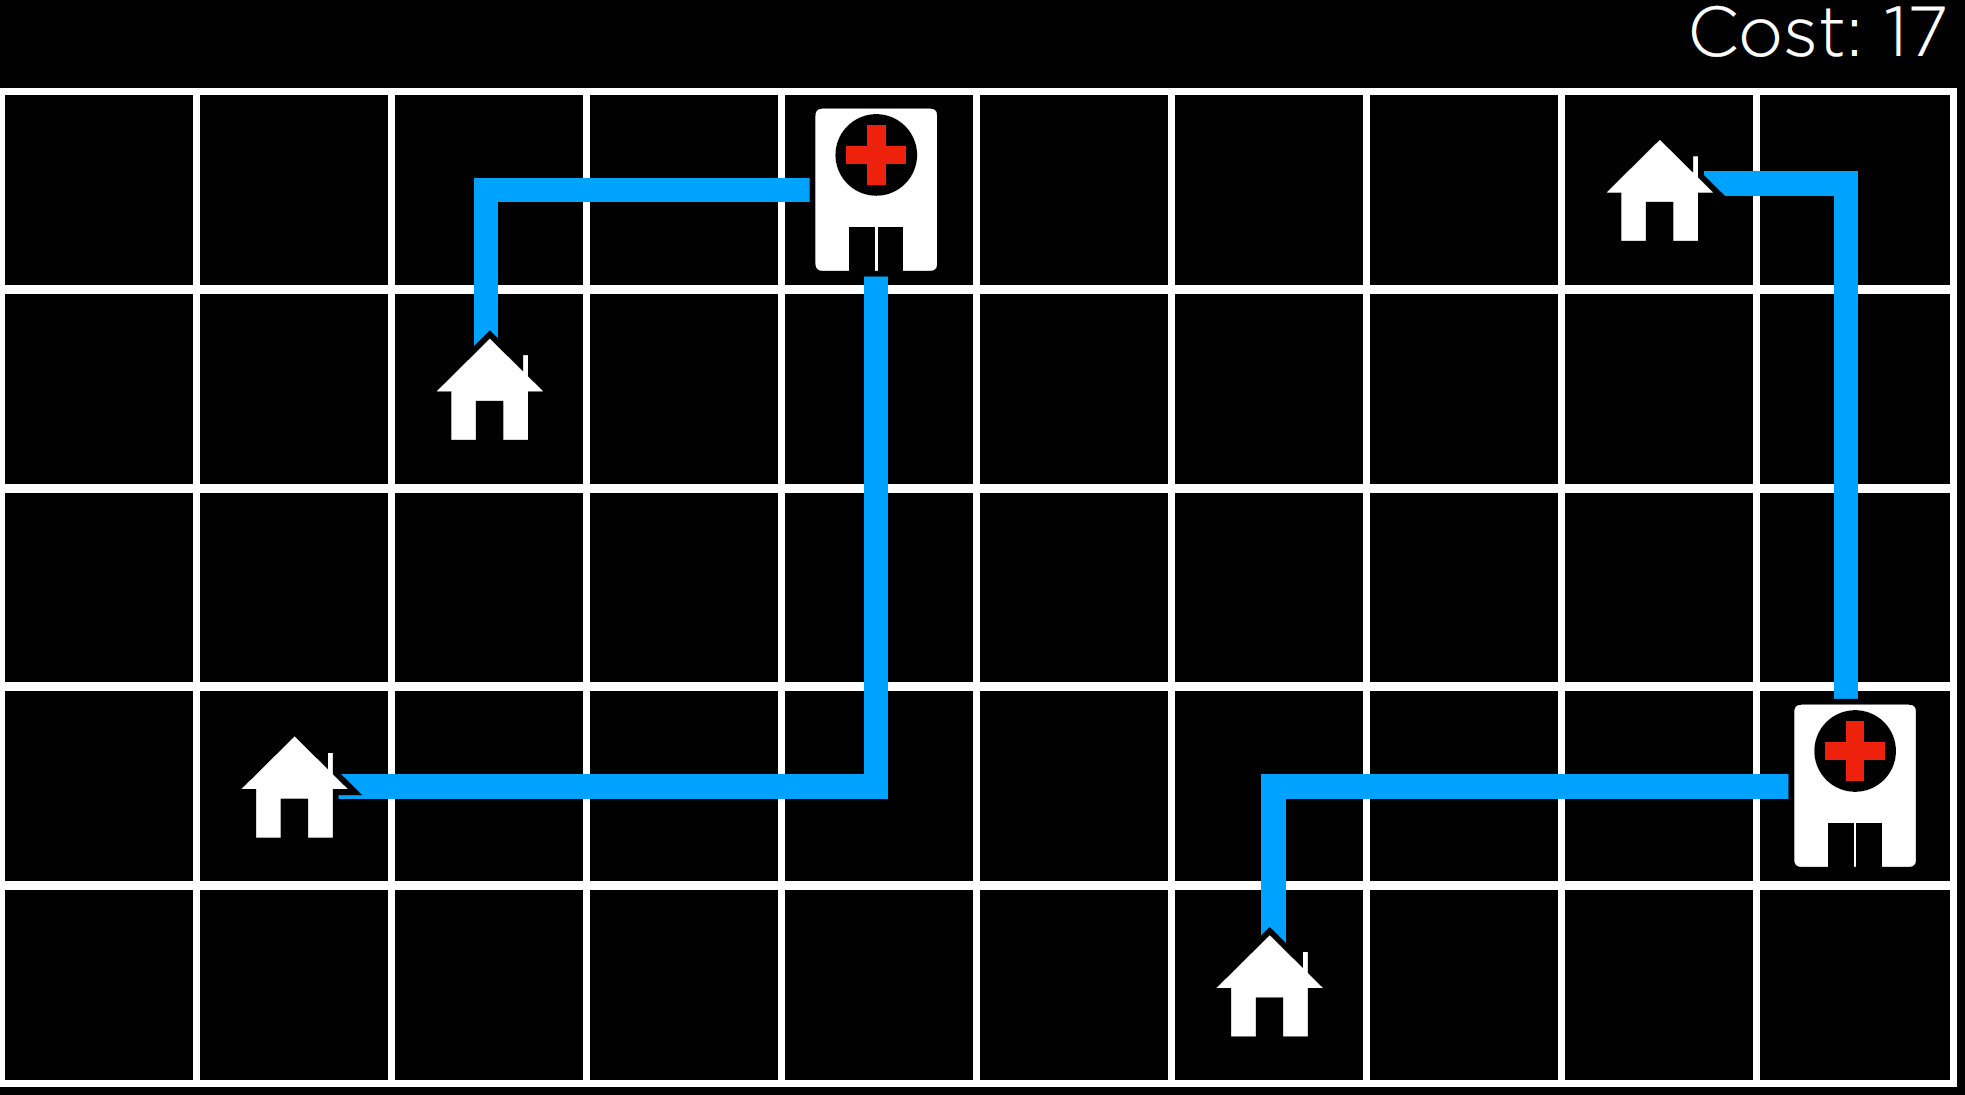

E ora controllo se uno dei vicini ha un valore minore di 17:

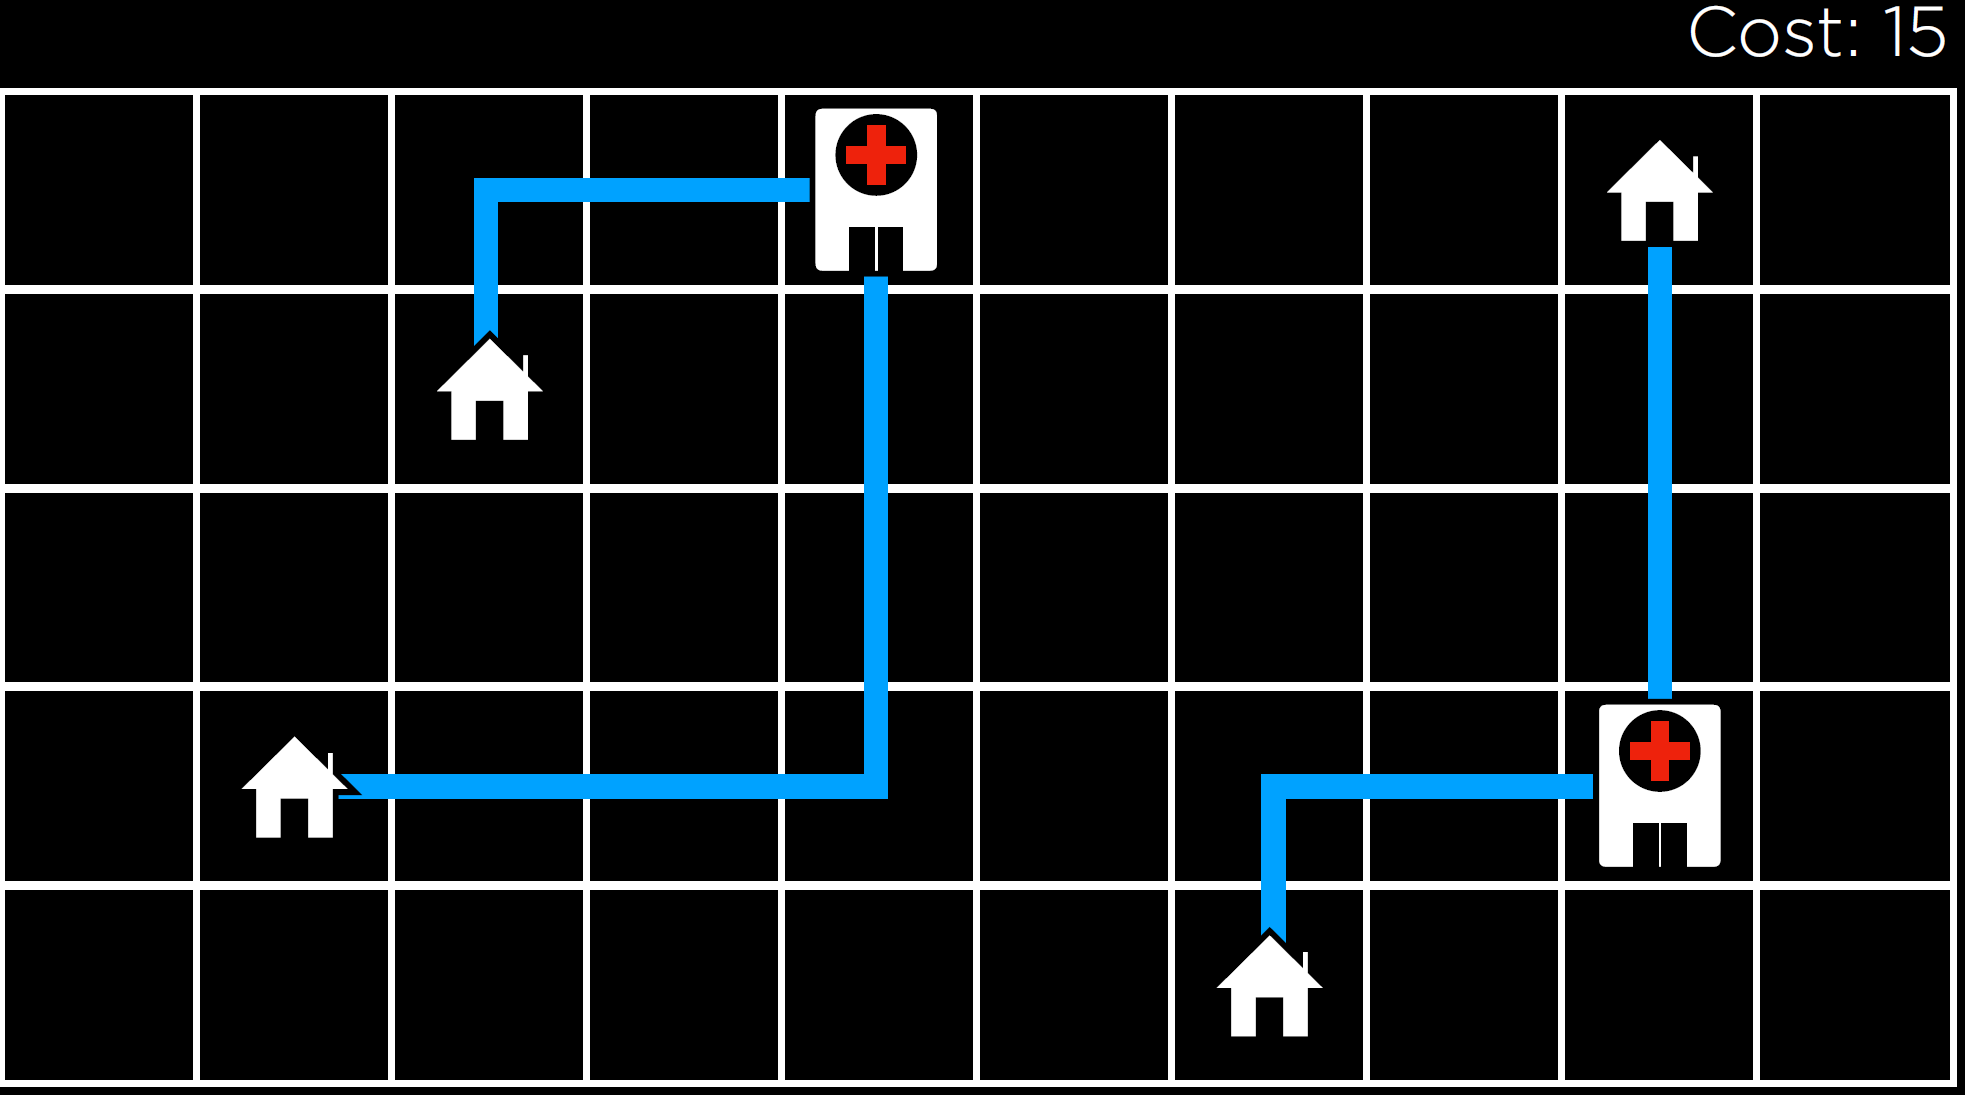

L'ospedale a destra ha raggiunto il suo "limite", se si sposta in qualsiasi direzione, ora, il costo rimane uguale o addirittura peggiora, rendendo inutile spostarlo. Quello a sinistra, invece, può ancora migliorare.

Valuto iterativamente i vicini dell'ospedale a sinistra e l'algoritmo arriverà alla conclusione:

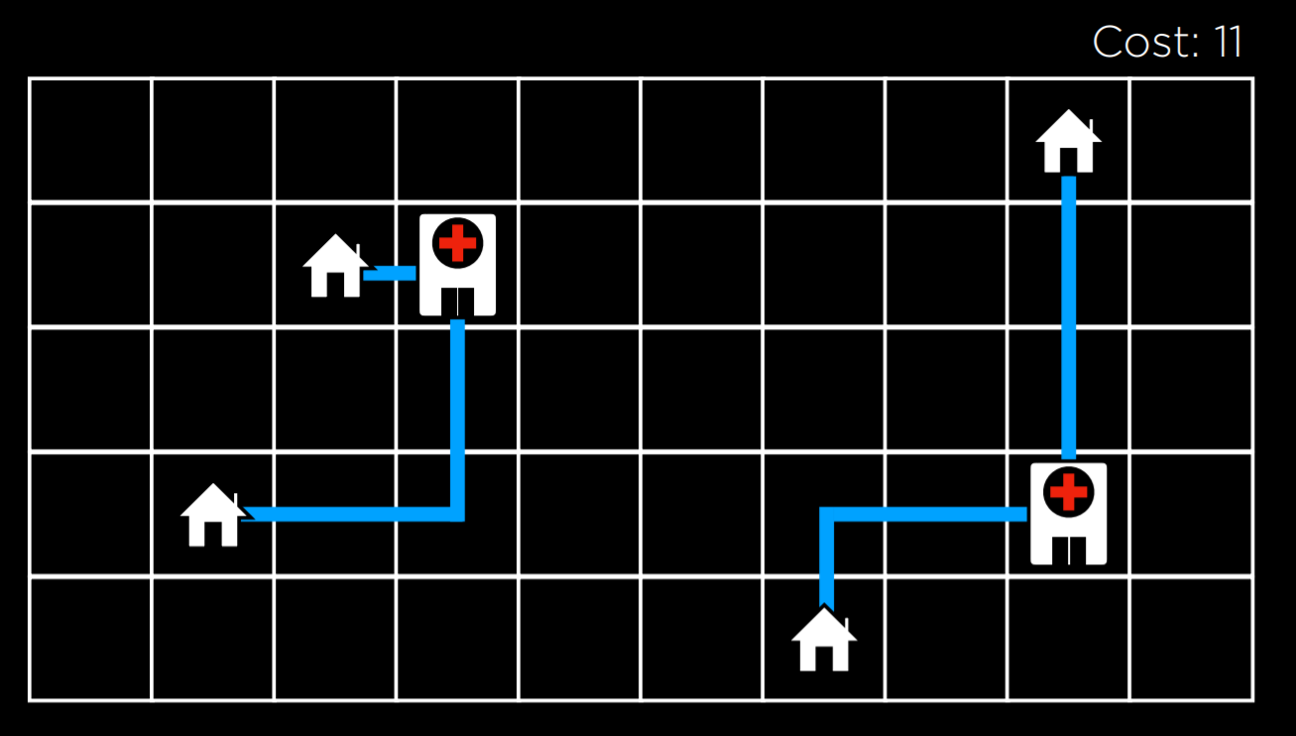

Che per quanto buona potrebbe ancora migliorare, ma ciò implicherebbe un peggioramento momentaneo del costo, cosa che l'algoritmo non contempla (Distanza di Manhattan, possiamo muoverci solo nelle quattro direzioni cardinali).

Ci troviamo infatti in un **minimo locale**. Lo stato migliore sarebbe:

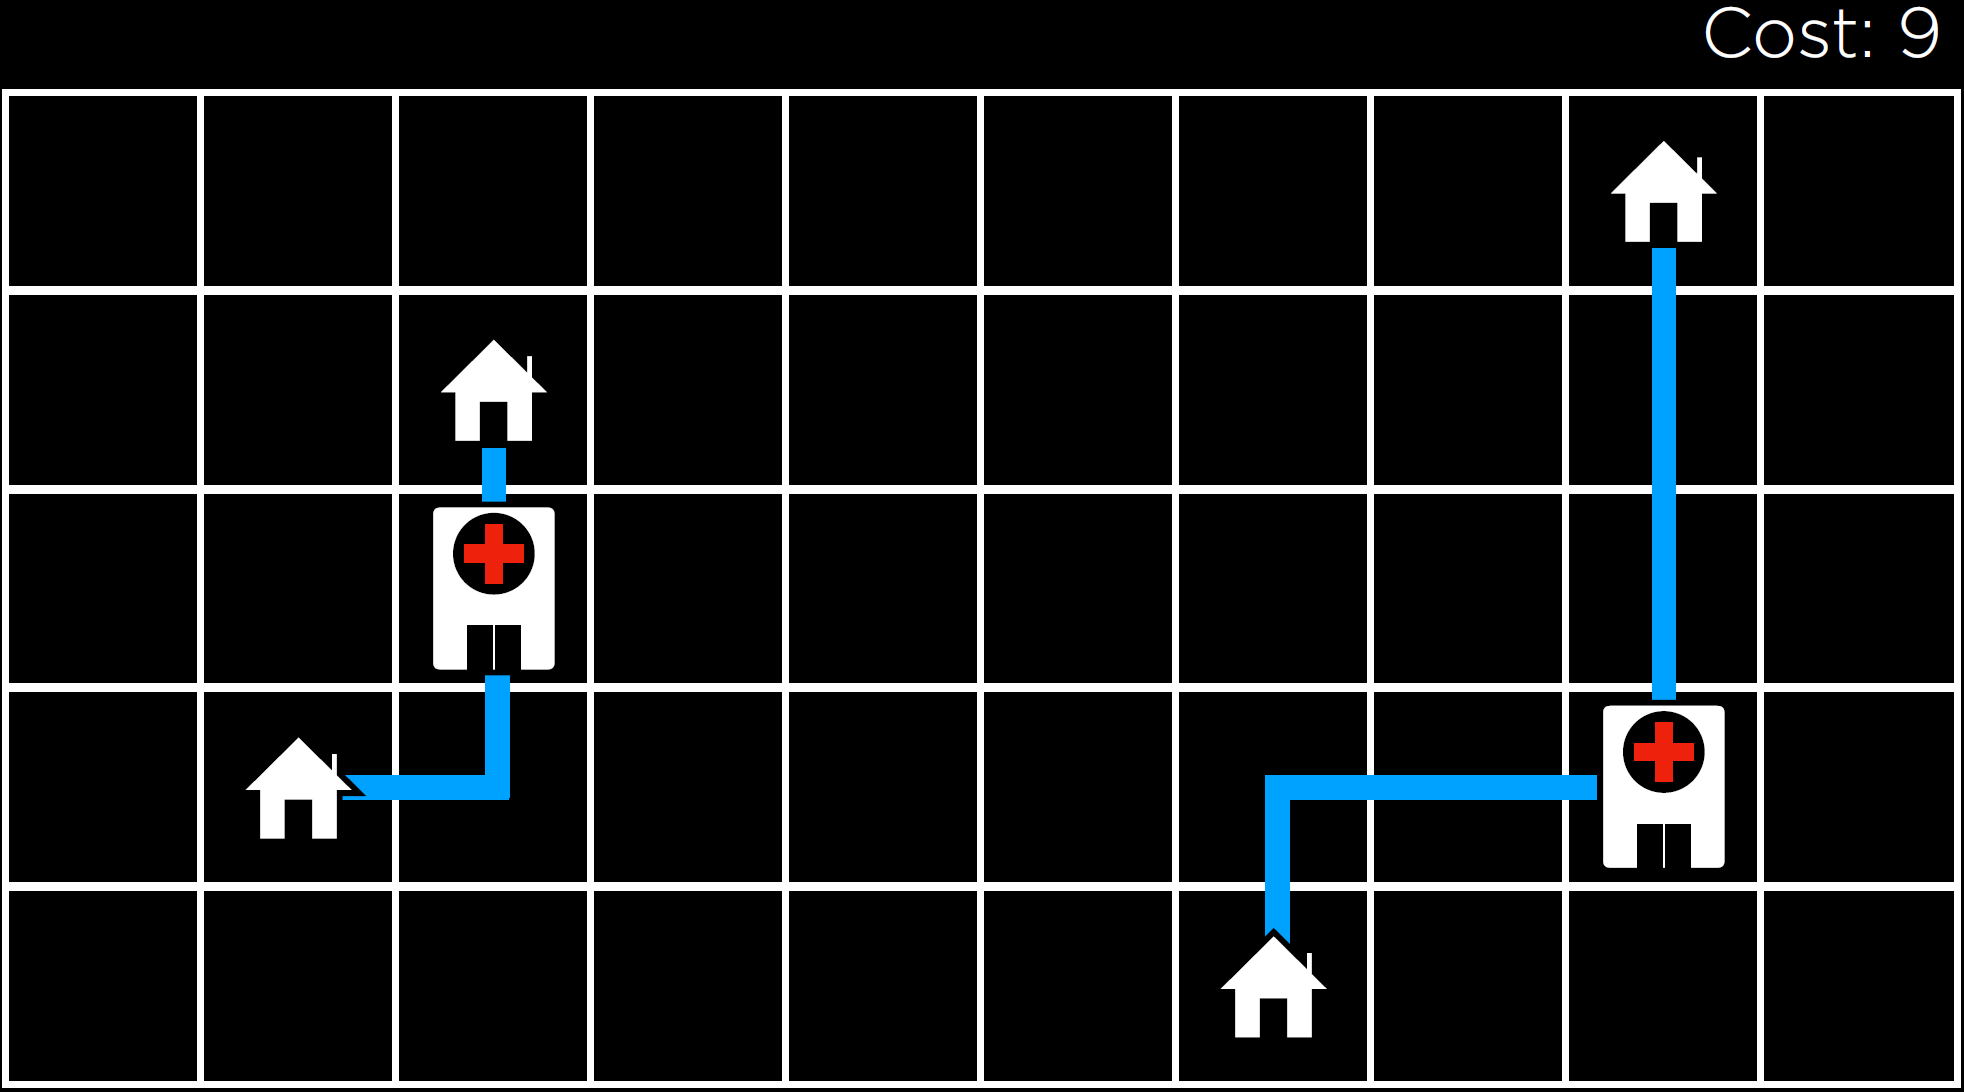

## Minimi e Massimi, locali e globali

Un algoritmo di Hill Climbing, quindi, può rimanere bloccato in minimi o massimi locali, ignaro dei minimi o massimi globali.

Ricorda:

- Un **massimo locale** è il valore più alto rispetto ai suoi vicini
- Un **massimo globale** è il valore più alto di tutta la funzione
- Discorso analogo e complementare per **minimi locali** e **minimi globali**

Questa è la debolezza dell'Hill Climbing. Una volta raggiunto un minimo o massimo locale, a seconda della funzione, l'algoritmo si ferma.

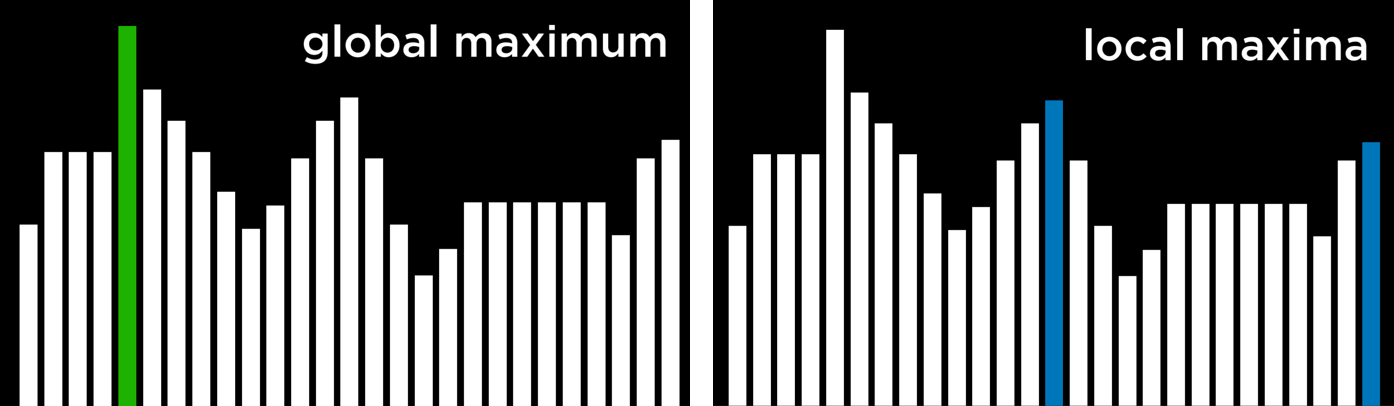
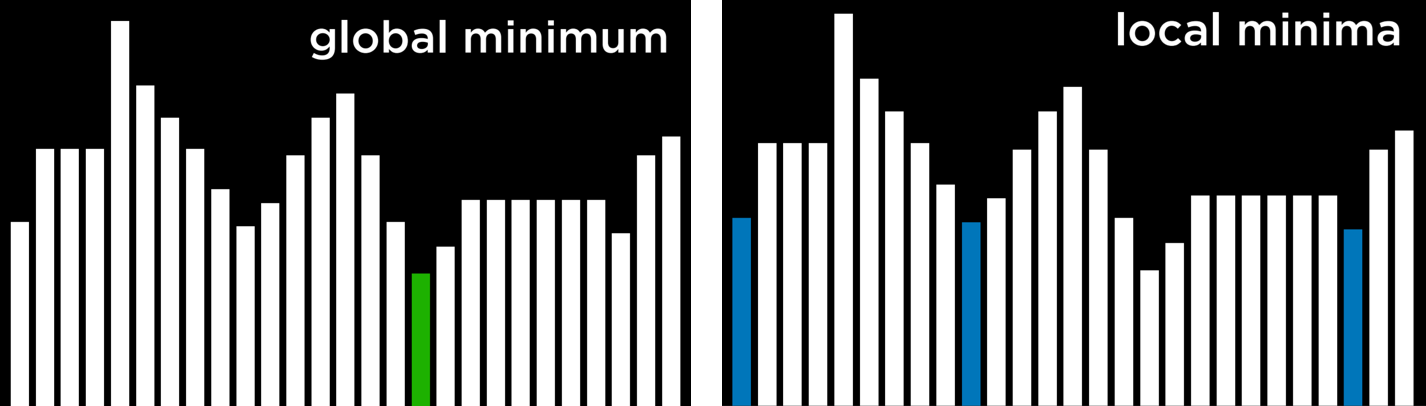
___

C'è un altro tipo di minimo/massimo locale: i **minimi/massimi locali piatti**

Questi minimi/massimi piatti accadono quando più vicini assumono lo stesso valore, creando un plateau. I vicini che assumono lo stesso valore del mio stato attuale sono detti **spalle** (shoulder).

Se un algoritmo Hill Climbing inizia in mezzo a un plateau, non c'è modo di iterare e spostarsi.

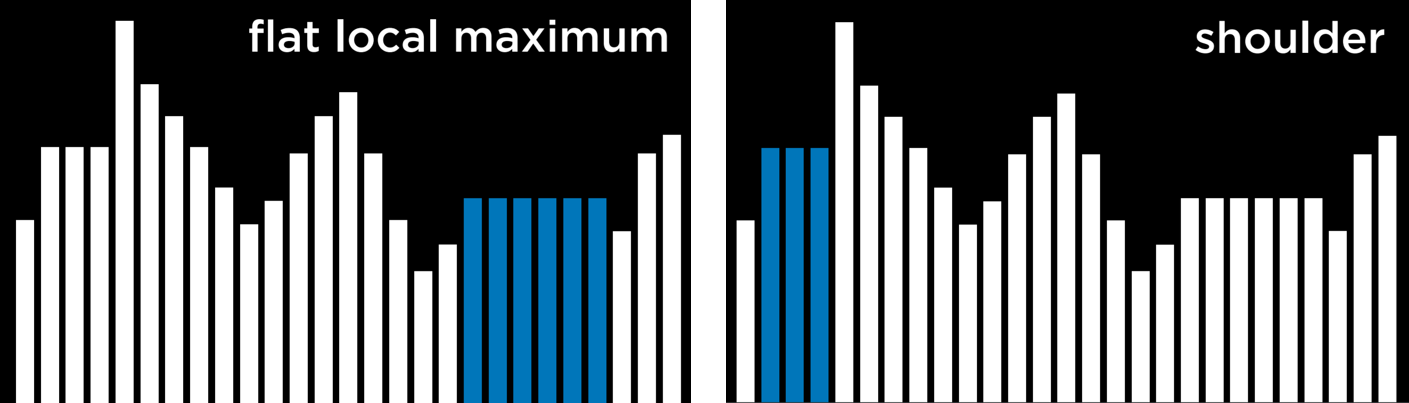

## Varianti di Hill Climbing

| Variante | Definizione |
| --- | --- |
| A salita rapida (steepest ascent) | Scegli il vicino col valore più alto |
| Stocastico | Scegli casualmente tra i vicini con valore più alto |
| Prima scelta (first-choice) | Scegli il primo vicino col valore più alto |
| Random Restart | Effettua Hill Climbing molteplici volte |
| Local Beam Search | sceglie $k$ vicini col valore più alto |

Spiegazione **Stocastico**
: Facendo così, scegliamo ogni direzione migliore piuttosto che il nostro valore. Questo ha senso se, ad esempio, il vicino col valore più alto porta a un massimo locale mentre un altro porta a un massimo locale.

Spiegazione **Random Restart**
: Le tre versioni precedenti rischiano ancora di finire in minimi o massimi locali. Restartando l'algoritmo e randomizzando il punto di inizio, per poi scegliere il valore migliore, minimizziamo il rischio di ottenere risultati inefficienti.

### Codice esempio per le varianti di Hill Climb

#### Salita rapida con Random Restart

In [hospitals.py](hospitals/hospitals.py)

Assicurarsi di eseguirlo avendo la cartella dove si trova hospitals.py come root nel terminale

# Simulated Annealing

Questo algoritmo, quando si trova in minimi o massimi locali, cerca di svincolarsi dallo stato attuale. Ha questo nome perché simula il processo fisico di "annealing", cioè il fenomeno di riscaldare il metallo e farlo raffreddare lentamente per fortificarlo.

Un sistema fisico, quando si riscaldano le particelle, si "riempie" di energia, le particelle si muovono in modo caotico, ma nel tempo si raffredda in una forma ben definita.

## Processo di simulazione

- Inizialmente, ho "temperature" più alte
  - Probabilità maggiore di accettare vicini che hanno valori peggiori del mio stato attuale

- Nel tempo, ho "temperature" minori
  - Meno probabile che accetti vicini con valori peggiori del mio stato attuale

### Pseudocodice Simulated Annealing

I valori in parentesi quadre [] rappresentano variabili

[max] = quante volte voglio simulare

[ΔE] = differenza di Energia

[e^(ΔE/T)] = rappresentazione del fattore di Boltzman
  - $\frac{ΔE}{T}$ ha come unità $\frac{J}{K}$, che è l'unità di entropia
___

```
function Simulated-Annealing([problem], [max]):

[current] = initial state of [problem]
for [t = 1] to [max]:
    [T] = Temperature([t])
    [neighbor] = random neighbor of [current]
    [ΔE] = how much better [neighbor] is than [current]
    if [ΔE > 0]:
        [current] = [neighbor]
    with probability [e^(ΔE/T)] set [current] = [neighbor]
return [current]
```

L'algoritmo prende in input un `problema` e un valore massimo di reiterazioni `max`.

Ad ogni iterazione, `T` viene impostata utilizzando una funzione di temperatura. Questa funzione restituisce un valore più alto nelle prime iterazioni (quando `t` è basso) e un valore più basso nelle iterazioni successive (quando `t` è alto).

Successivamente, viene selezionato un vicino casuale e viene calcolato `ΔE`, che quantifica quanto il nuovo stato sia migliore rispetto allo stato attuale.  

Se il nuovo stato è migliore di quello attuale (`ΔE > 0`), come in precedenza, si imposta il nuovo stato come stato attuale.

Tuttavia, se il nuovo stato è peggiore (`ΔE < 0`), è comunque possibile accettarlo come nuovo stato attuale, con una probabilità pari a `e^(ΔE/T)`.

L’idea è che un `ΔE` più negativo porti a una probabilità minore di accettare il nuovo stato, mentre una temperatura `T` più alta aumenta la probabilità che il vicino venga scelto.
  
In altre parole, valgono entrambe le seguenti affermazioni:
- Peggiore è lo stato vicino, meno è probabile che venga scelto.
- Più l’algoritmo è nelle fasi iniziali (alta temperatura), più è probabile che scelga un vicino che è uno stato peggiore.

### Spiegazione matematica

- $e$ è una costante (circa 2,72).
- $ΔE$ è negativo (perché il nuovo stato è peggiore).
- Più $ΔE$ è negativo, più $e^{\frac{ΔE}{T}}$ tende a 0.
- Più è alta la temperatura $T$, più il rapporto $\frac{ΔE}{T}$ si avvicina a 0, rendendo la probabilità $e^{\frac{ΔE}{T}}$ più vicina a 1.

### Concetto

Parto da questo stato iniziale.

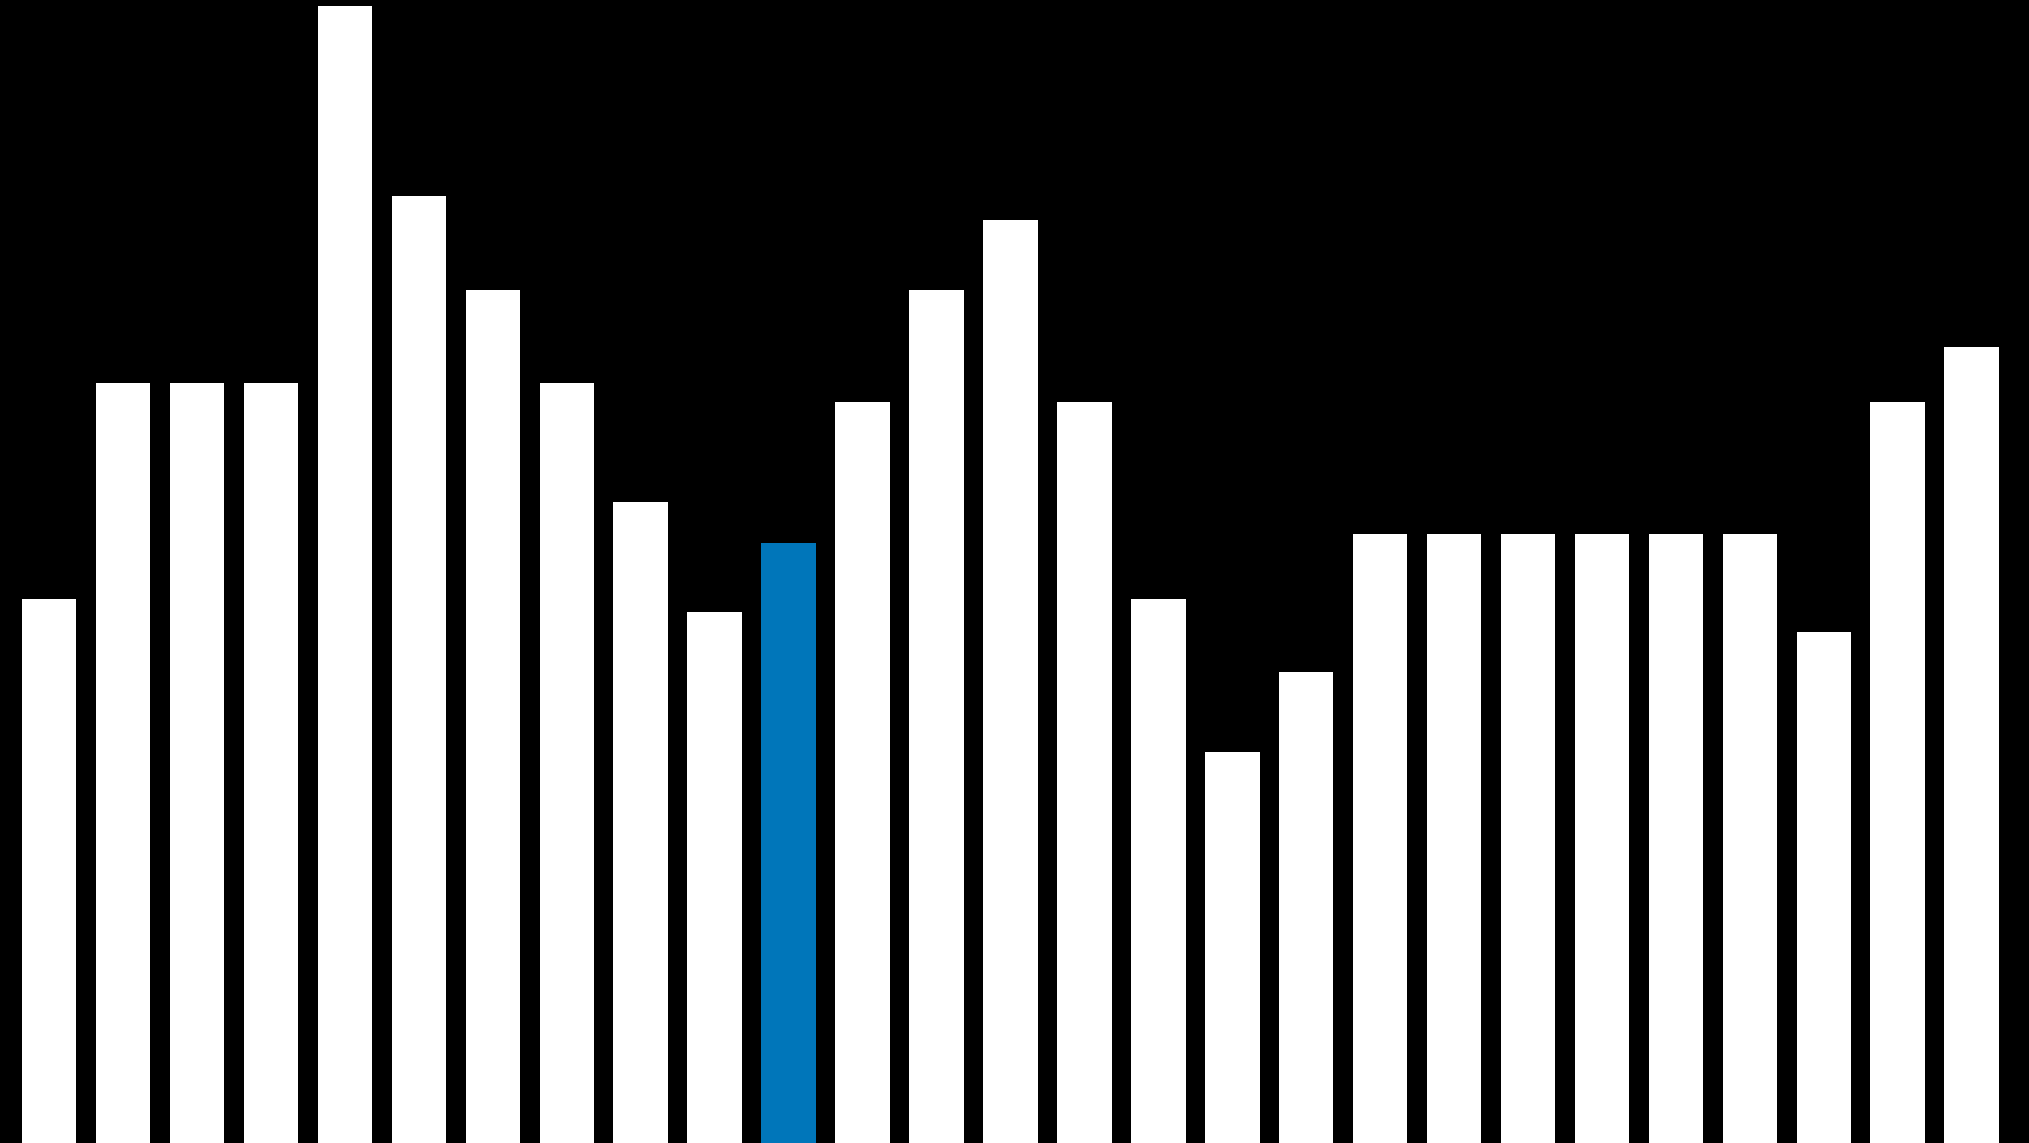

Hill Climbing deciderebbe di andare verso destra, poiché quel vicino ha valore maggiore, ma ciò ci incastrerebbe in un massimo locale.

Se vogliamo una possibilità di raggiungere il massimo globale, dobbiamo permetterci di ottenere, temporaneamente, soluzioni poco ottimali:

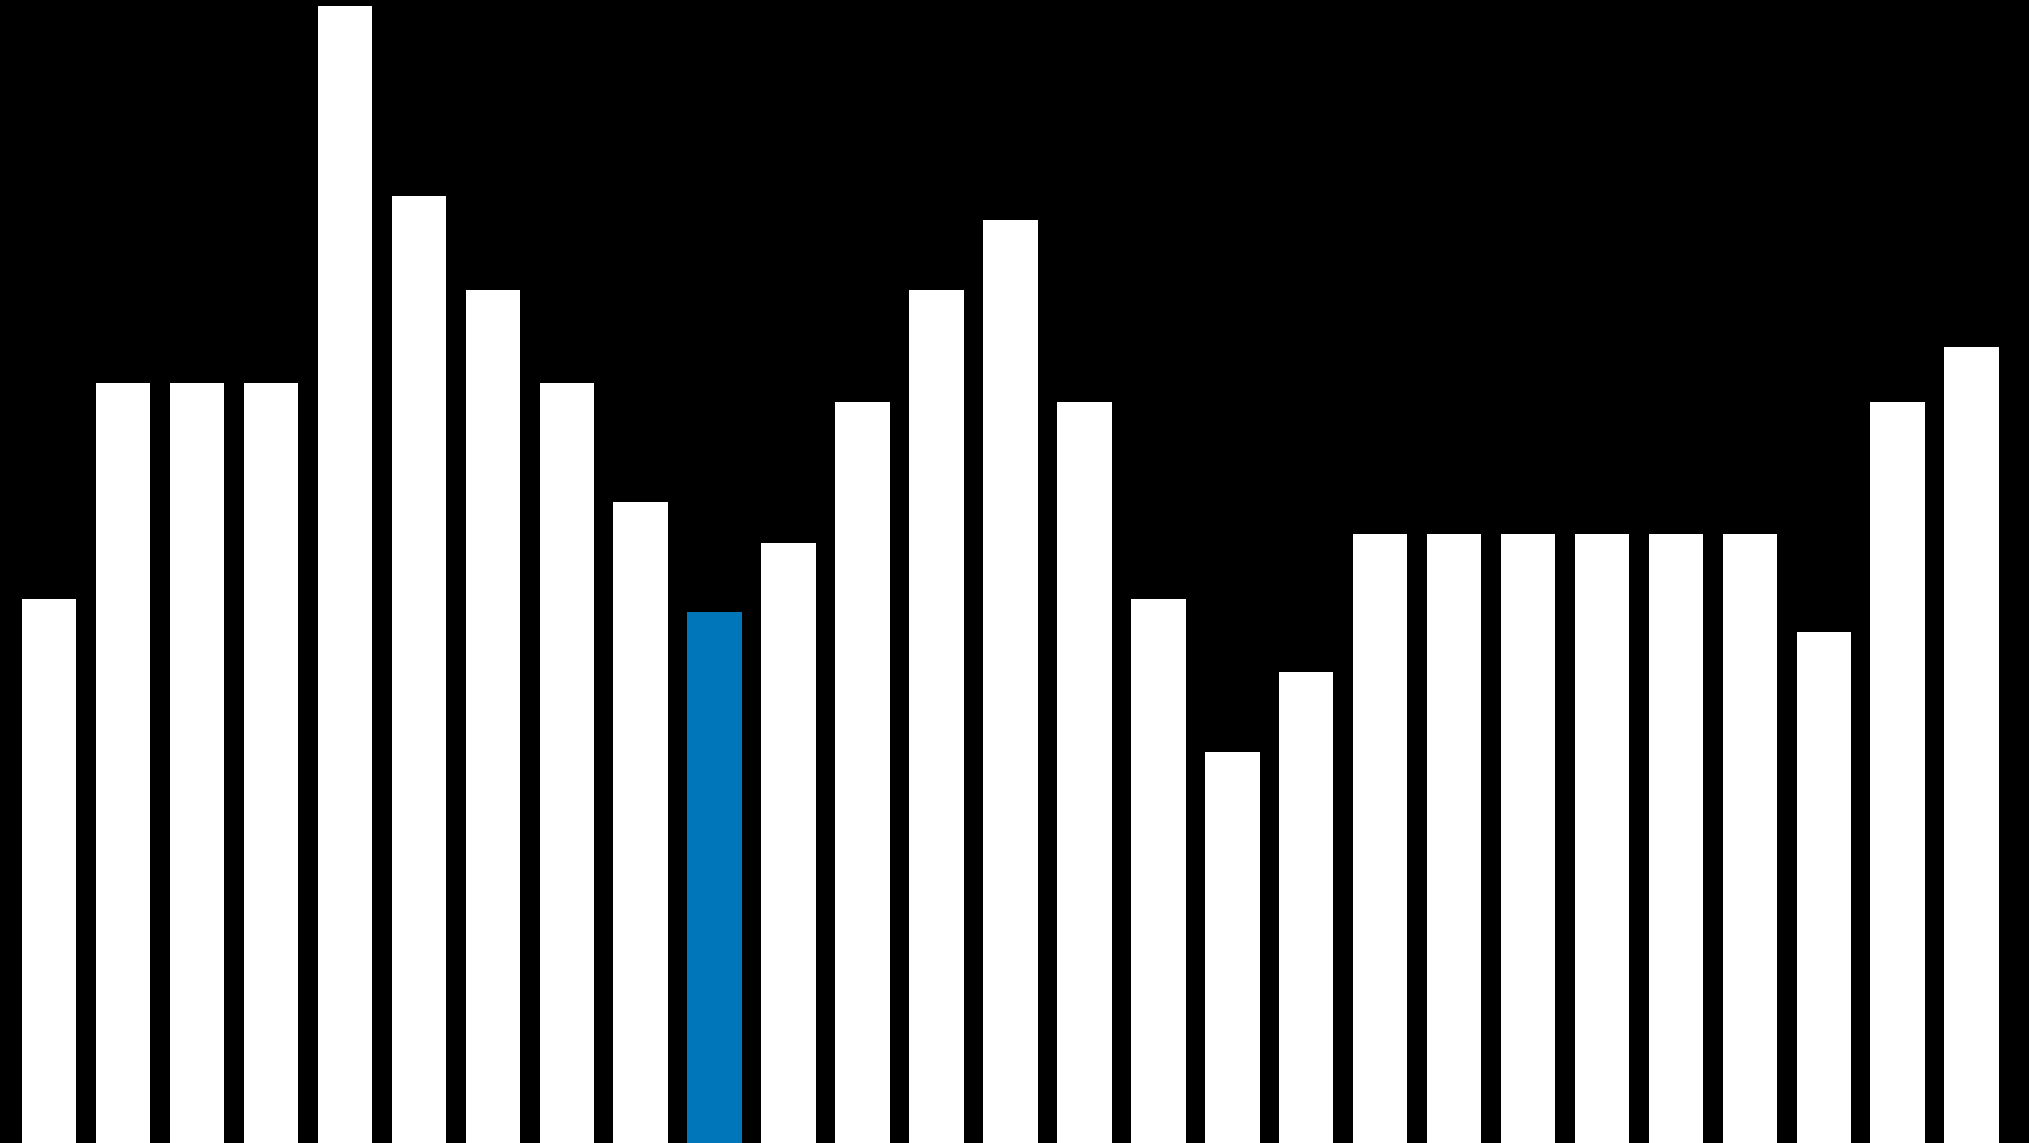

Per poter raggiungere il nostro vero obiettivo:

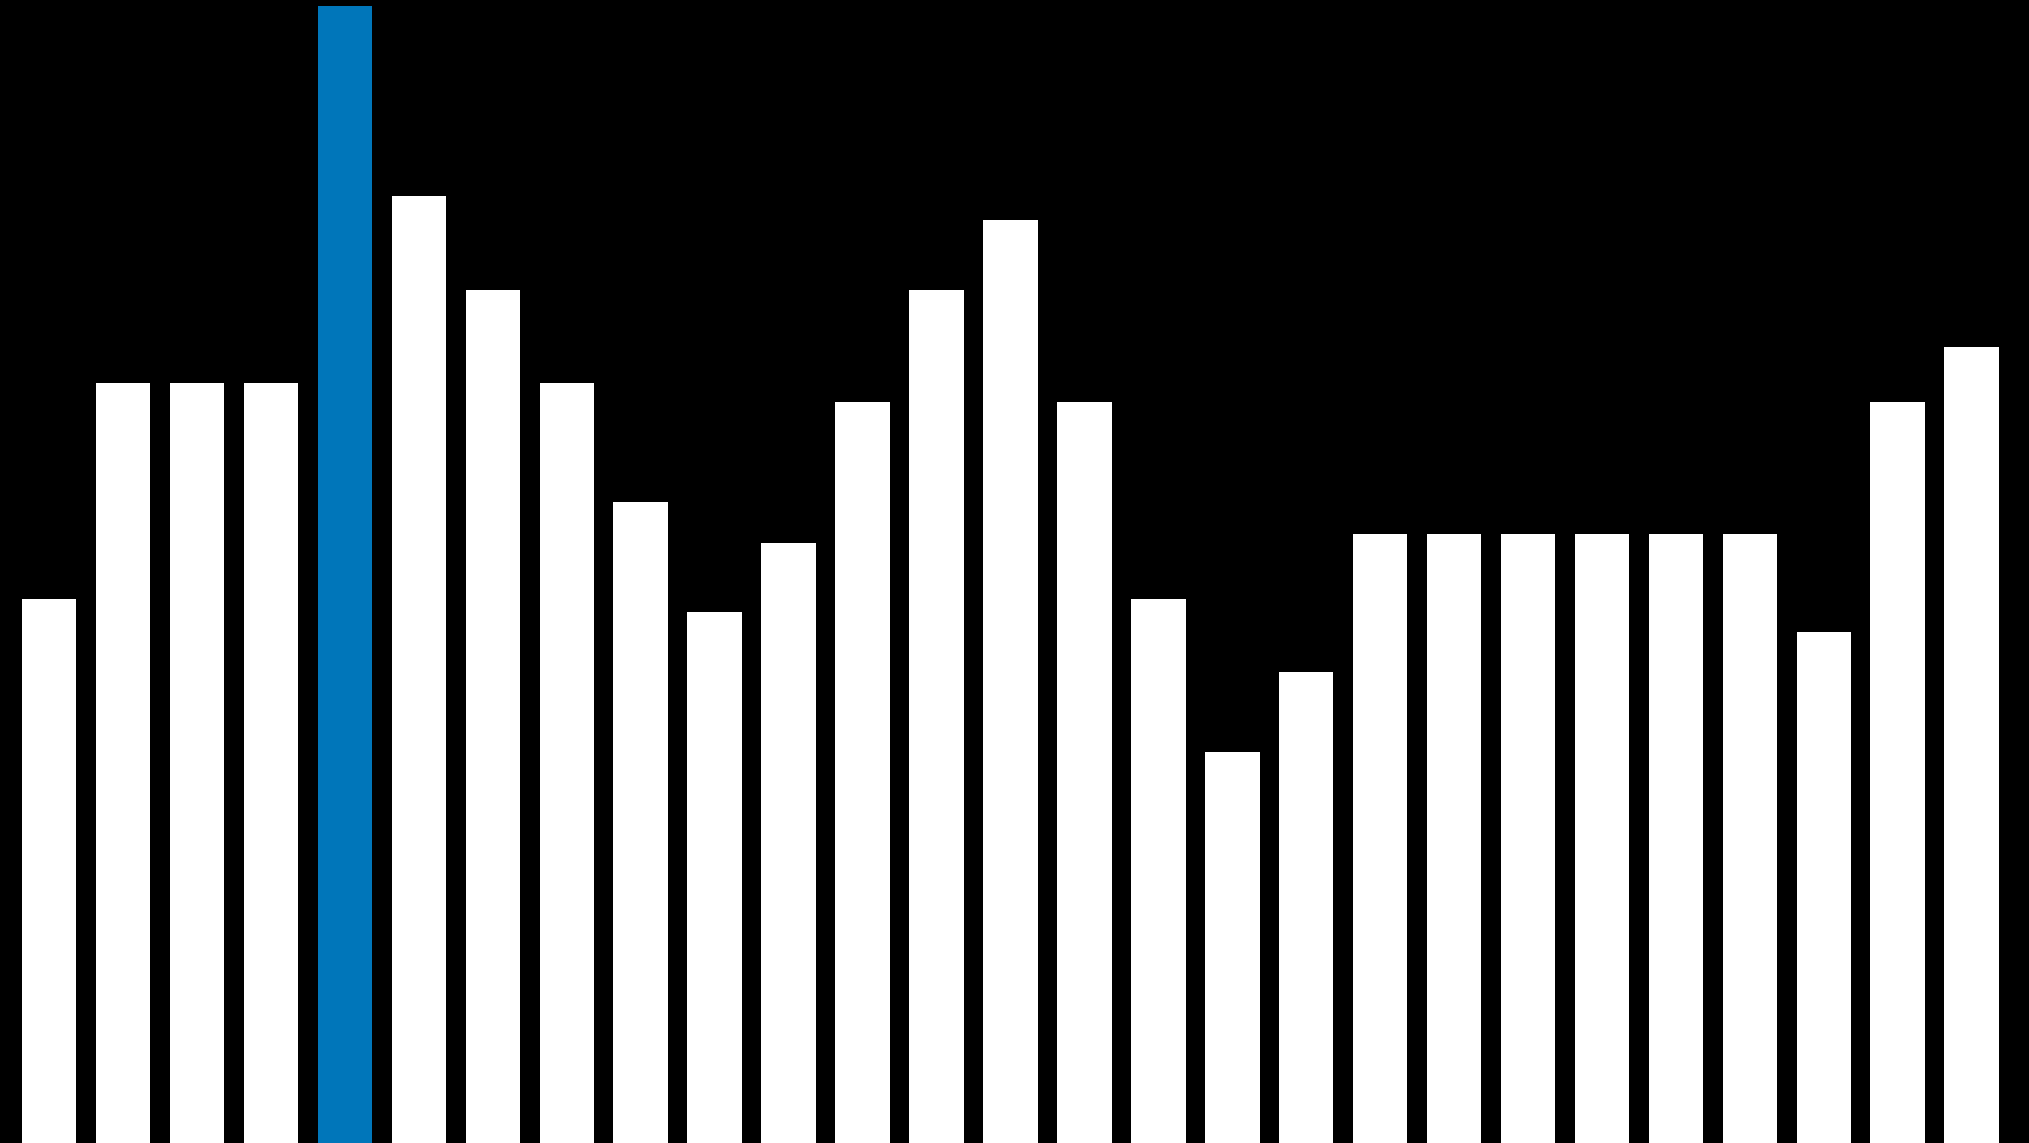

### Esempio: Venditore porta a porta

Cerchiamo di collegare tutti i nodi tra loro cercando di scegliere la distanza minore. È quello di cui hanno bisogno le compagnie di consegna per assicurarsi di percorrere le distanze più brevi.

Tuttavia, risolvere un problema del genere è computazionalmente faticoso, e ricade nei problemi *NP-completi*, per cui non esiste una soluzione efficiente. Dobbiamo quindi trovare una soluzione anche se poco efficiente.

Preso una configurazione casuale:

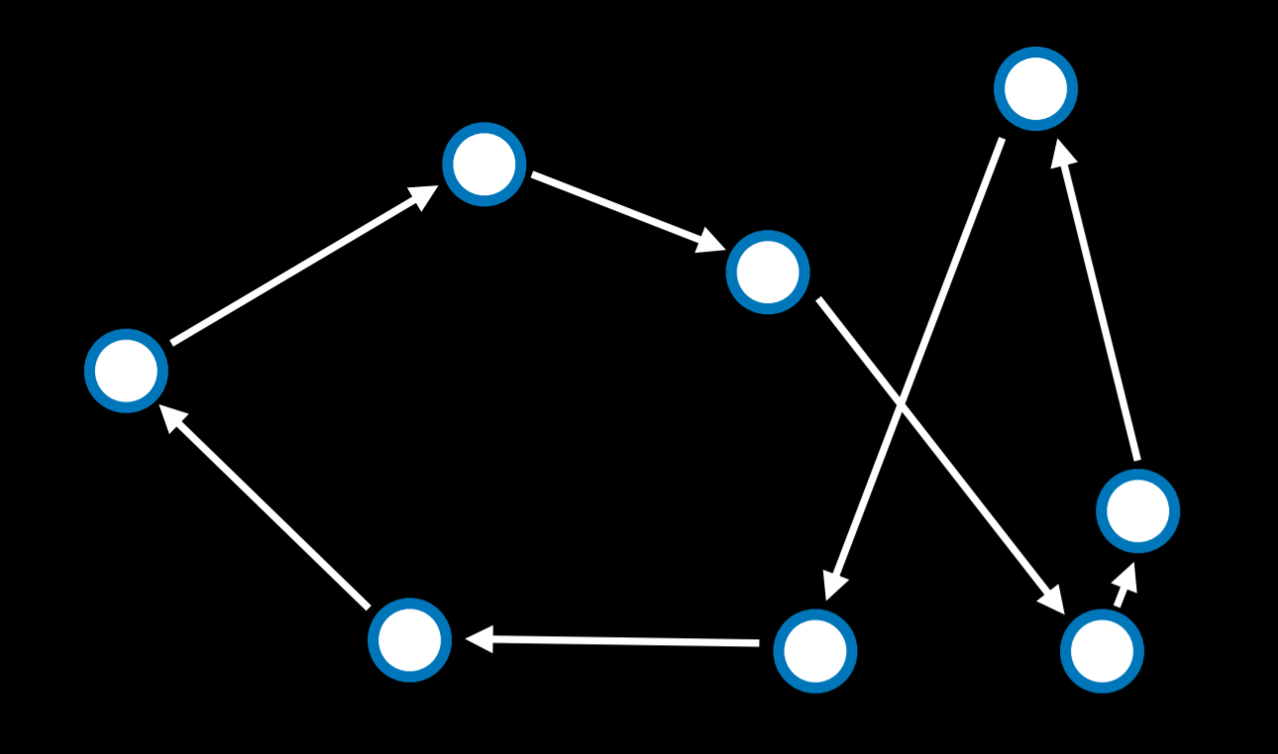

E ora voglio cercare di renderla più efficiente.

Mi chiedo innanzitutto: cosa significa avere un "vicino"? Ci sono vari definizioni, ma una possibile: un vicino è ciò che accade se presi due collegamenti tra nodi, li scambiamo.

Ad esempio:

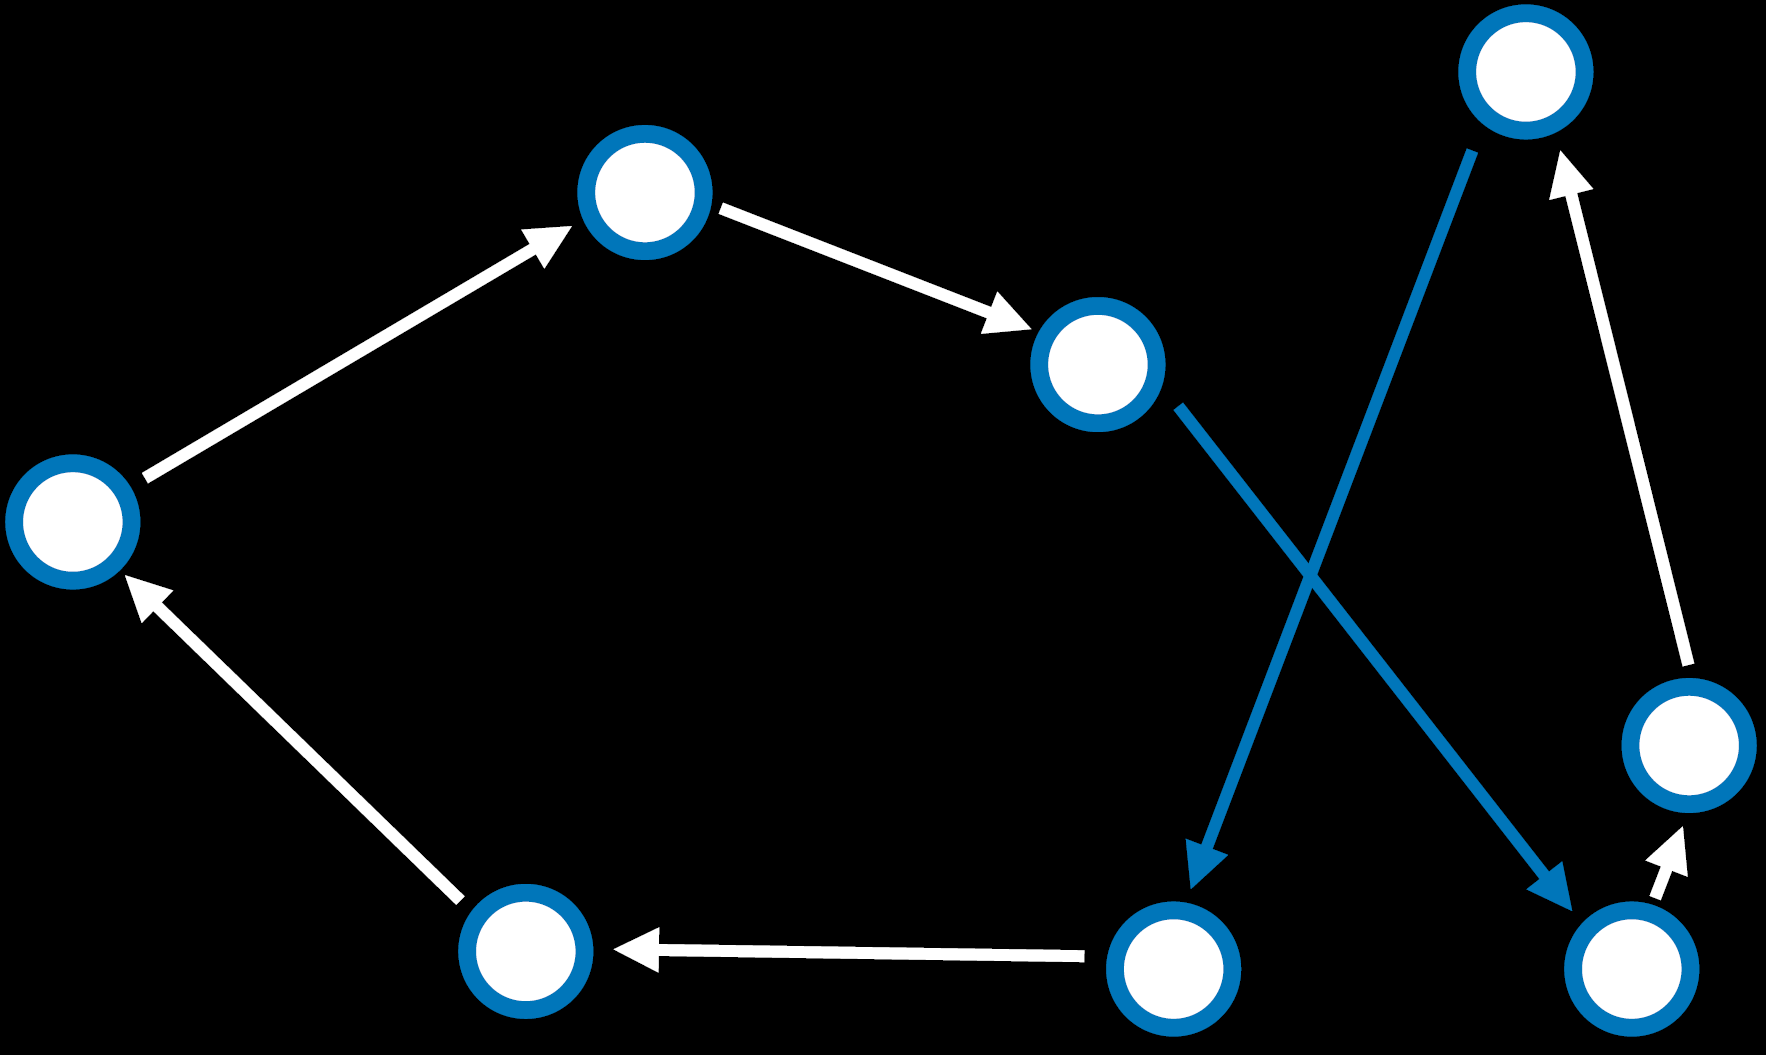

Rimuoviamo le frecce evidenziate, connetto i due nodi superiori da sinistra a destra, i due inferiori da destra a sinistra, e inverto le due frecce laterali:

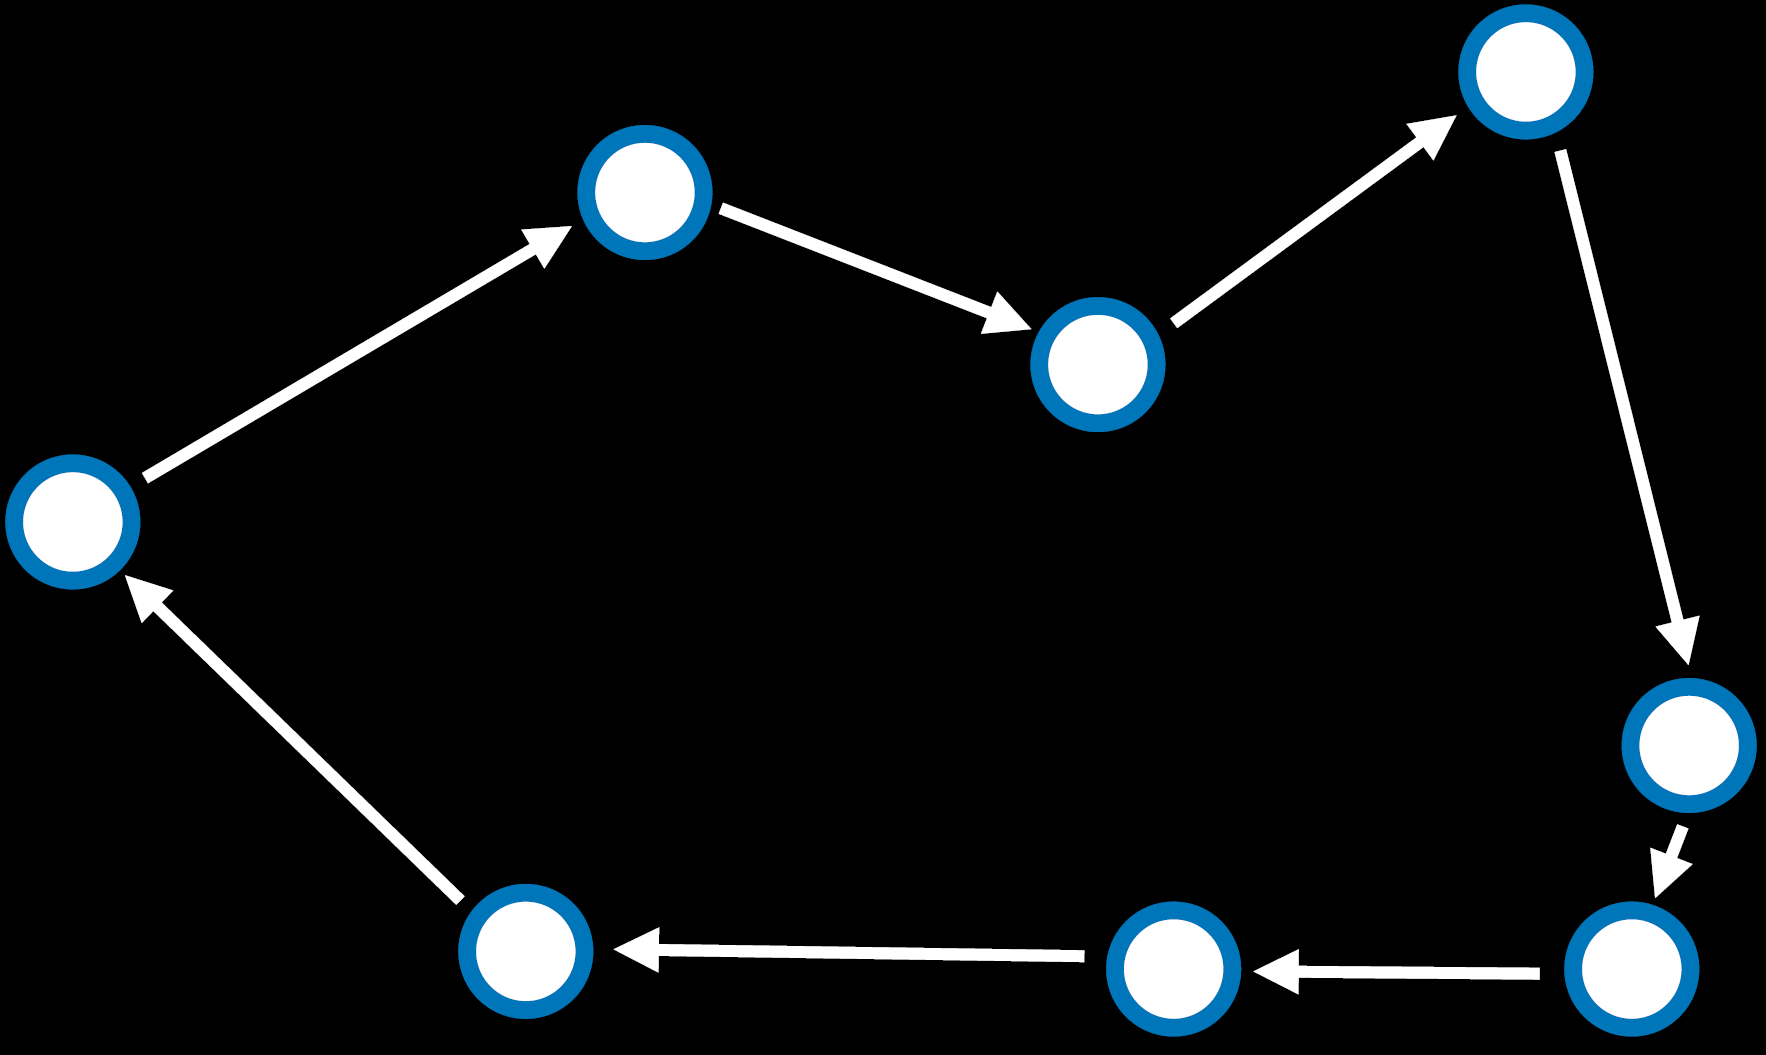